# Baseball Case Study Project

## Dataset Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Description of the columns present in the dataset:

W - Wins: The number of games a pitcher won when their team took the lead and won the game.

R - Runs: The number of times a player crosses home plate and scores a run.

AB - At Bat: A batter's turn at the plate, excluding walks, hit by pitch, sacrifices, interference, or obstruction.

H - Hits: The number of times a batter safely reaches first base with a fair hit ball.

2B - Double: A hit where the batter reaches second base safely without a fielding error.

3B - Triple: A hit where the batter reaches third base safely without a fielding error.

HR - Home Runs: A hit where the batter circles all bases and scores without defensive errors.

BB - Base on Balls (Walk): When a batter receives four pitches outside the strike zone and is awarded first base.

SO - Strikeout (K): When a batter accumulates three strikes and is called out.

SB - Stolen Base: When a runner advances to a base without the ball being in the possession of the defense.

RA - Run Average: Measures the rate at which runs are allowed or scored.

ER - Earned Run: A run fully enabled by the offensive team's production, not due to errors or passed balls.

ERA - Earned Run Average: The average of earned runs allowed by a pitcher per nine innings pitched.

CG - Complete Game: When a pitcher pitches an entire game without relief.

SHO - Shutout: When a pitcher completes a game without allowing the opposing team to score.

SV - Save: Credited to a pitcher who finishes a game for the winning team under specific circumstances.

E - Errors: When a fielder misplay a ball, allowing a batter or baserunner to advance or continue their plate appearance.


### Objective: 
The objective of this project is to predict the no. of wins. 

#### Features: 
R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E

#### Target Variable: 
W (No. of wins)

## Importing libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

# Support Vector Regression
from sklearn.svm import SVR

# Ensemble algorithms
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, 
BaggingRegressor)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data splitting and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Saving and loading models
import joblib

## Importing dataset

In [2]:
# Load data from CSV into dataframe
df = pd.read_csv('Baseball_Dataset.csv')

In [3]:
# Display the first 5 rows of the dataframe
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

Dataframe has 16 independent variables and 1 dependent variable.

Independent Variables: R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E

Dependent Variable: W

In [4]:
# Display the last 5 rows of the dataframe
df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

## Exploratory Data Analysis

In [5]:
# Display the shape of the dataframe
df.shape

(30, 17)

Dataframe has 30 rows and 17 columns.

In [6]:
# Display the names of the columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
# Display the datatypes of all the columumns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Except 'ERA' all the columns have 'int' datatype.

In [8]:
# Checking for the null values in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values present in the dataset.

In [9]:
# Checking for the duplicated rows in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataframe.

In [10]:
# Checking for the number of unique values present inside each column
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

W contains 24 unique values.

R contains 28 unique values.

AB contains 29 unique values.

H contains 29 unique values.

2B contains 22 unique values.

3B contains 23 unique values.

HR contains 27 unique values.

BB contains 29 unique values.

SO contains 29 unique values.

SB contains 27 unique values.

RA contains 30 unique values.

ER contains 30 unique values.

ERA contains 30 unique values.

CG contains 9 unique values.

SHO contains 12 unique values.

SV contains 20 unique values.

E contains 21 unique values.

In [11]:
# Display the unique values present inside each column
for i in df.columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

W :
[ 95  83  81  76  74  93  87  80  78  88  86  85  68 100  98  97  64  90
  71  67  63  92  84  79]


R :
[724 696 669 622 689 891 764 713 644 748 751 729 661 656 694 647 697 655
 640 683 703 613 573 626 667 720 650 737]


AB :
[5575 5467 5439 5533 5605 5509 5567 5485 5640 5511 5459 5417 5544 5600
 5484 5631 5491 5480 5571 5527 5428 5463 5420 5529 5385 5565 5649 5457
 5572]


H :
[1497 1349 1395 1381 1515 1480 1397 1370 1383 1495 1419 1363 1331 1379
 1405 1386 1462 1341 1378 1382 1351 1420 1361 1374 1346 1486 1494 1324
 1479]


2B :
[300 277 303 260 289 308 272 246 278 294 279 243 262 288 292 274 257 295
 265 236 251 263]


3B :
[42 44 29 27 49 17 19 20 32 33 26 21 22 46 39 30 34 13 40 18 37 48 36]


HR :
[139 156 141 136 151 232 212 217 167 161 172 230 176 198 146 137 140 171
 145 177 120 100 130 187 154 148 186]


BB :
[383 439 533 404 455 570 554 418 436 478 503 486 435 475 506 461 567 412
 496 488 539 375 471 387 563 457 490 426 388]


SO :
[ 973 1264 1157 1231 1259 1151 1227 13

Each column contains a wide array of distinct and diverse values.

In [12]:
# Display the value count for each unique value present in the columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In the majority of columns, each unique value is represented with a count of 1, with only a few exceptions where certain values occur 2 times. Additionally, a very few columns exhibit unique values with counts of 3, 4, 5, 6, or 7.

In [13]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [14]:
# Display summary statistics of the dataframe
df.describe().T

count         mean         std      min        25%       50%      75%  \
W     30.0    80.966667   10.453455    63.00    74.0000    81.000    87.75   
R     30.0   688.233333   58.761754   573.00   651.2500   689.000   718.25   
AB    30.0  5516.266667   70.467372  5385.00  5464.0000  5510.000  5570.00   
H     30.0  1403.533333   57.140923  1324.00  1363.0000  1382.500  1451.50   
2B    30.0   274.733333   18.095405   236.00   262.2500   275.500   288.75   
3B    30.0    31.300000   10.452355    13.00    23.0000    31.000    39.00   
HR    30.0   163.633333   31.823309   100.00   140.2500   158.500   177.00   
BB    30.0   469.100000   57.053725   375.00   428.2500   473.000   501.25   
SO    30.0  1248.200000  103.759470   973.00  1157.5000  1261.500  1311.50   
SB    30.0    83.500000   22.815225    44.00    69.0000    83.500    96.50   
RA    30.0   688.233333   72.108005   525.00   636.2500   695.500   732.50   
ER    30.0   635.833333   70.140786   478.00   587.2500   644.500   679.25   
ERA   30.0     3.956333    0.454089     2.94     3.6825     4.025     4.22   
CG    30.0     3.466667    2.763473     0.00     1.0000     3.000     5.75   
SHO   30.0    11.300000    4.120177     4.00     9.0000    12.000    13.00   
SV    30.0    43.066667    7.869335    28.00    37.2500    42.000    46.75   
E     30.0    94.333333   13.958889    75.00    86.0000    91.000    96.75   

         max  
W     100.00  
R     891.00  
AB   5649.00  
H    1515.00  
2B    308.00  
3B     49.00  
HR    232.00  
BB    570.00  
SO   1518.00  
SB    134.00  
RA    844.00  
ER    799.00  
ERA     5.04  
CG     11.00  
SHO    21.00  
SV     62.00  
E     126.00

Here's a concise interpretation of the summary statistics in the context of each column:

#### W (Wins):
The average number of wins per team is approximately 81, with a standard deviation of 10.45.
Most teams fall within the range of 74 to 87 wins (25th to 75th percentile), with a minimum of 63 and a maximum of 100 wins.

#### R (Runs):
Teams scored an average of about 688 runs during the season.
The spread of runs is relatively narrow, with most teams falling within the range of 651 to 718 runs (25th to 75th percentile).
The lowest scoring team had 573 runs, while the highest scored 891.

#### AB (At Bat):
The average number of at-bats per team is approximately 5516.
The range of at-bats is relatively tight, with the majority of teams having between 5464 and 5570 at-bats (25th to 75th percentile).
The lowest number of at-bats is 5385, and the highest is 5649.

#### H (Hits):
Teams averaged about 1403 hits in the season.
Teams fall within the range of 1363 to 1451.5 hits (25th to 75th percentile).
The lowest hits recorded by a team are 1324, and the highest are 1515.

#### 2B (Doubles):
The average number of doubles per team is approximately 275.
Teams had between 262.25 and 288.75 doubles on average (25th to 75th percentile).
The minimum number of doubles by a team is 236, and the maximum is 308.

#### 3B (Triples):
Teams averaged 31.3 triples during the season.
The spread of triples ranges from 23 to 39 (25th to 75th percentile).
The team with the fewest triples had 13, while the team with the most had 49.

#### HR (Home Runs):
Teams hit an average of 163.63 home runs.
The number of home runs per team ranges from 100 to 232, with variation in power hitting.
The 25th percentile is 140.25, and the 75th percentile is 177.

#### BB (Base on Balls - Walks):
Teams received an average of 469.1 walks.
Most teams had between 428.25 and 501.25 walks (25th to 75th percentile).
The lowest walk count is 375, while the highest is 570.

#### SO (Strikeouts):
Teams recorded an average of 1248.2 strikeouts.
Strikeout counts vary from 973 to 1518 (25th to 75th percentile).
The team with the fewest strikeouts had 973, and the team with the most had 1518.

#### SB (Stolen Bases):
Teams averaged 83.5 stolen bases during the season.
The spread of stolen bases ranges from 44 to 134 (25th to 75th percentile).
Some teams were more aggressive on the base paths than others.

#### RA (Run Average):
The average run average (RA) is the same as the average runs scored by teams, which is around 688.
Run averages range from 525 to 844, with some teams having better pitching performances than others.
The 25th percentile is 636.25, and the 75th percentile is 732.5.

#### ER (Earned Runs):
Teams gave up an average of 635.83 earned runs.
Earned runs vary from 478 to 799 (25th to 75th percentile).
The team with the fewest earned runs allowed had 478, and the team with the most allowed 799.

#### ERA (Earned Run Average):
The average earned run average (ERA) is approximately 3.96.
ERAs range from 2.94 to 5.04, indicating differences in pitching effectiveness.
The 25th percentile is 3.6825, and the 75th percentile is 4.22.

#### CG (Complete Games):
Teams averaged around 3.47 complete games, but the distribution is quite varied.
Some teams had no complete games, while others had as many as 11.
The 25th percentile is 1, and the 75th percentile is 5.75.

#### SHO (Shutouts):
Teams averaged 11.3 shutouts during the season.
Shutouts range from 4 to 21, suggesting variation in pitching dominance.
The 25th percentile is 9, and the 75th percentile is 13.

#### SV (Saves):
Teams recorded an average of 43.07 saves.
The number of saves varies from 28 to 62, with differences in bullpen effectiveness.
The 25th percentile is 37.25, and the 75th percentile is 46.75.

#### E (Errors):
Teams committed an average of 94.33 errors during the season.
Error counts range from 75 to 126 (25th to 75th percentile).
Some teams were more defensively sound than others.

## Data Visualization

In [15]:
sns.set(style = 'whitegrid')

### Univariate Analysis

#### Histogram

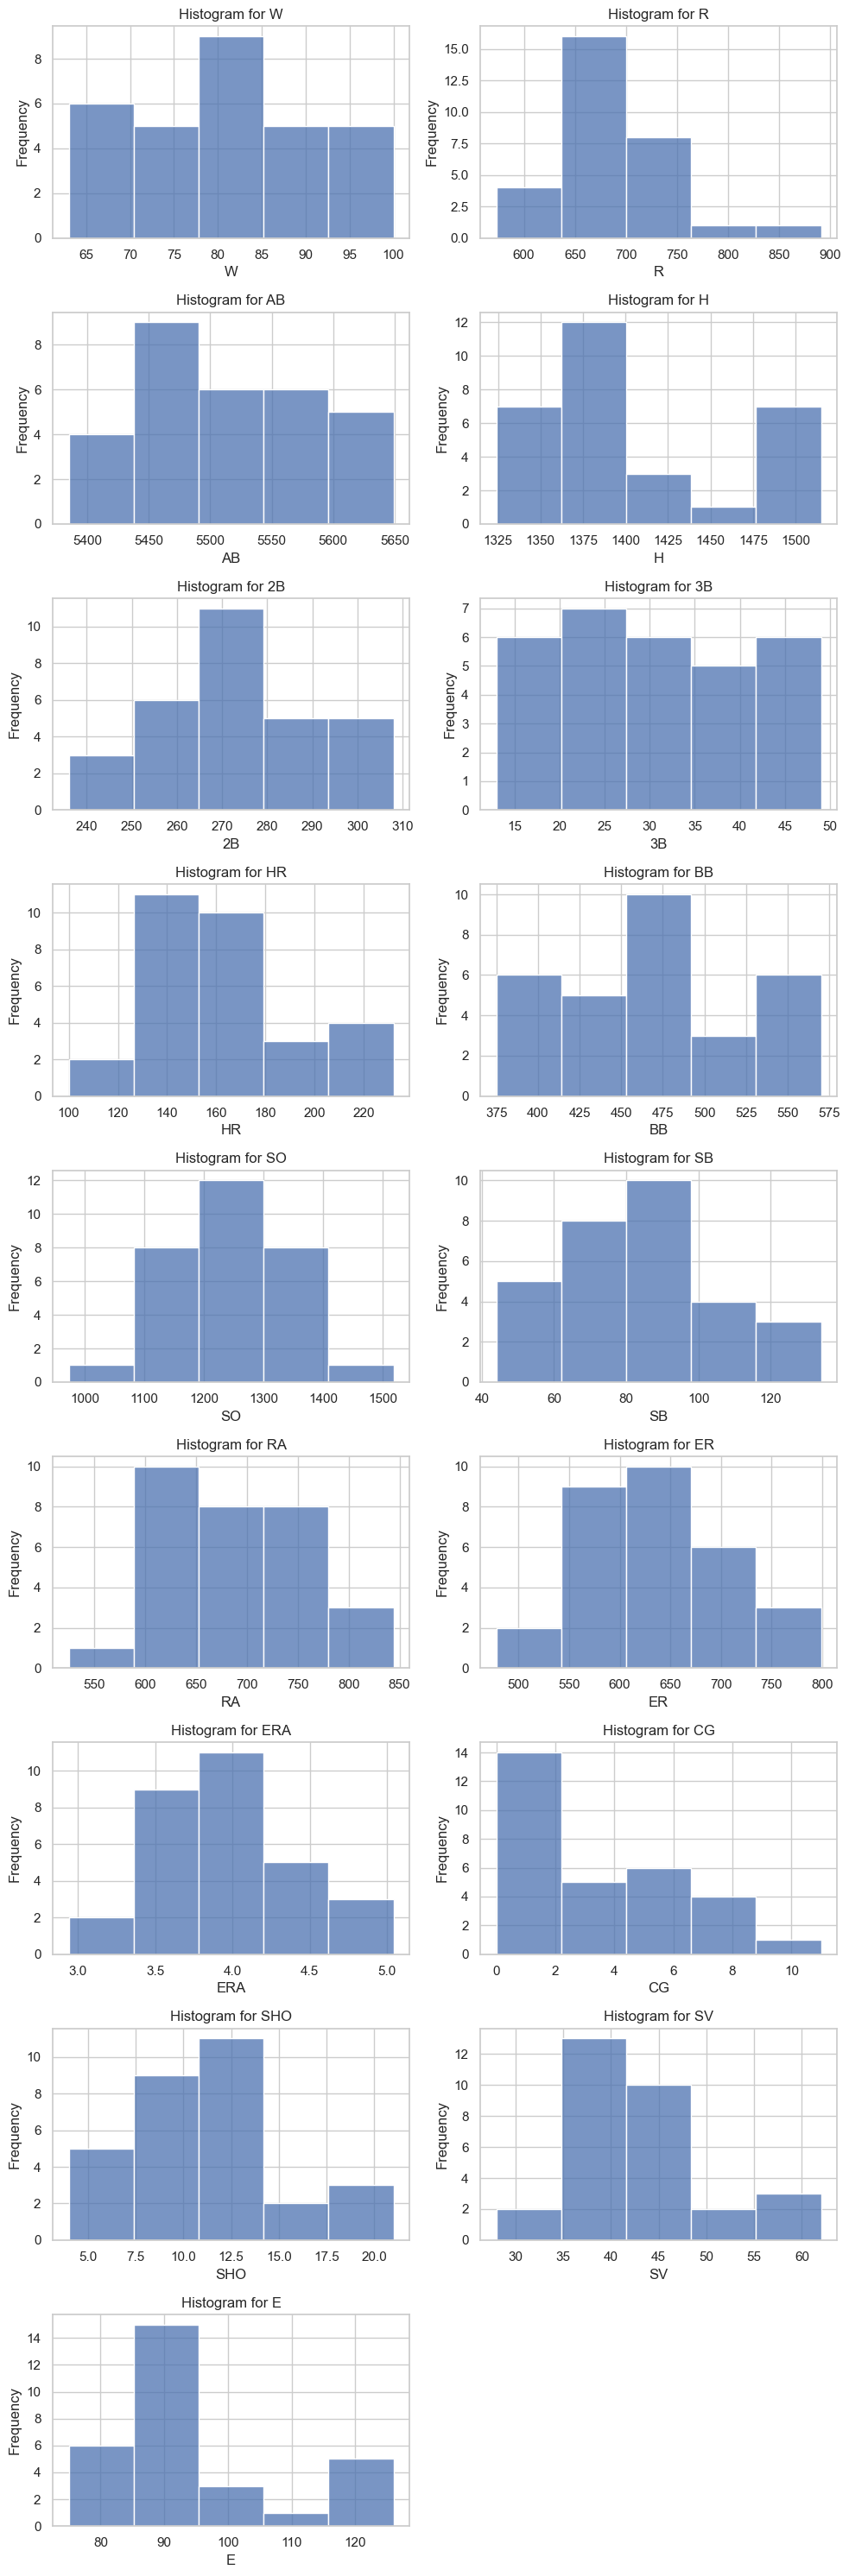

In [16]:
# Univariate analysis using Histogram
rows = 9
columns = 2

plt.figure(figsize = (10, 30))

for i in range(0, len(df.columns)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[df.columns[i]], bins = 5) 
    plt.title("Histogram for " + df.columns[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

#### Count Plot

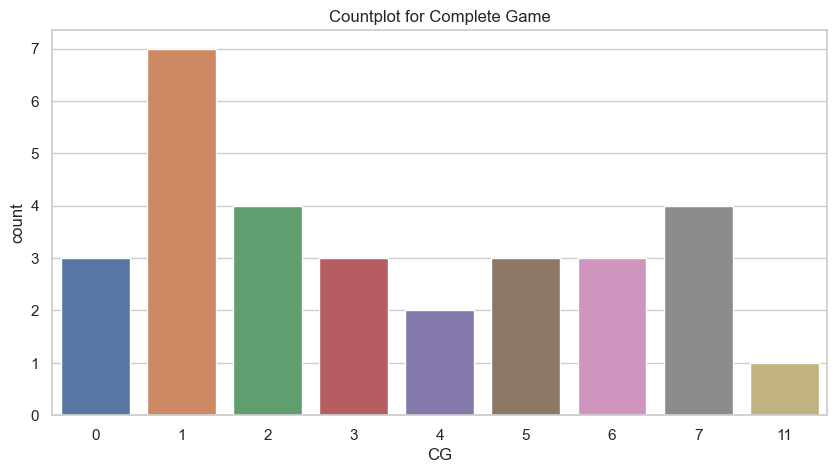

In [17]:
# Univariate analysis using countplot for column 'CG'
plt.figure(figsize = (10, 5))
sns.countplot(df['CG'])
plt.title("Countplot for Complete Game")
plt.show()

#### Observations:

1 Complete Game: There are 7 teams that achieved 1 complete game.

2 Complete Games: There are 4 teams that achieved 2 complete games.

7 Complete Games: There are 4 teams that achieved 7 complete games.

3 Complete Games: There are 3 teams that achieved 3 complete games.

0 Complete Games: There are 3 teams that did not achieve any complete games.

5 Complete Games: There are 3 teams that achieved 5 complete games.

6 Complete Games: There are 3 teams that achieved 6 complete games.

4 Complete Games: There are 2 teams that achieved 4 complete games.

11 Complete Games: There is 1 team that achieved 11 complete games.

#### Violin Plot

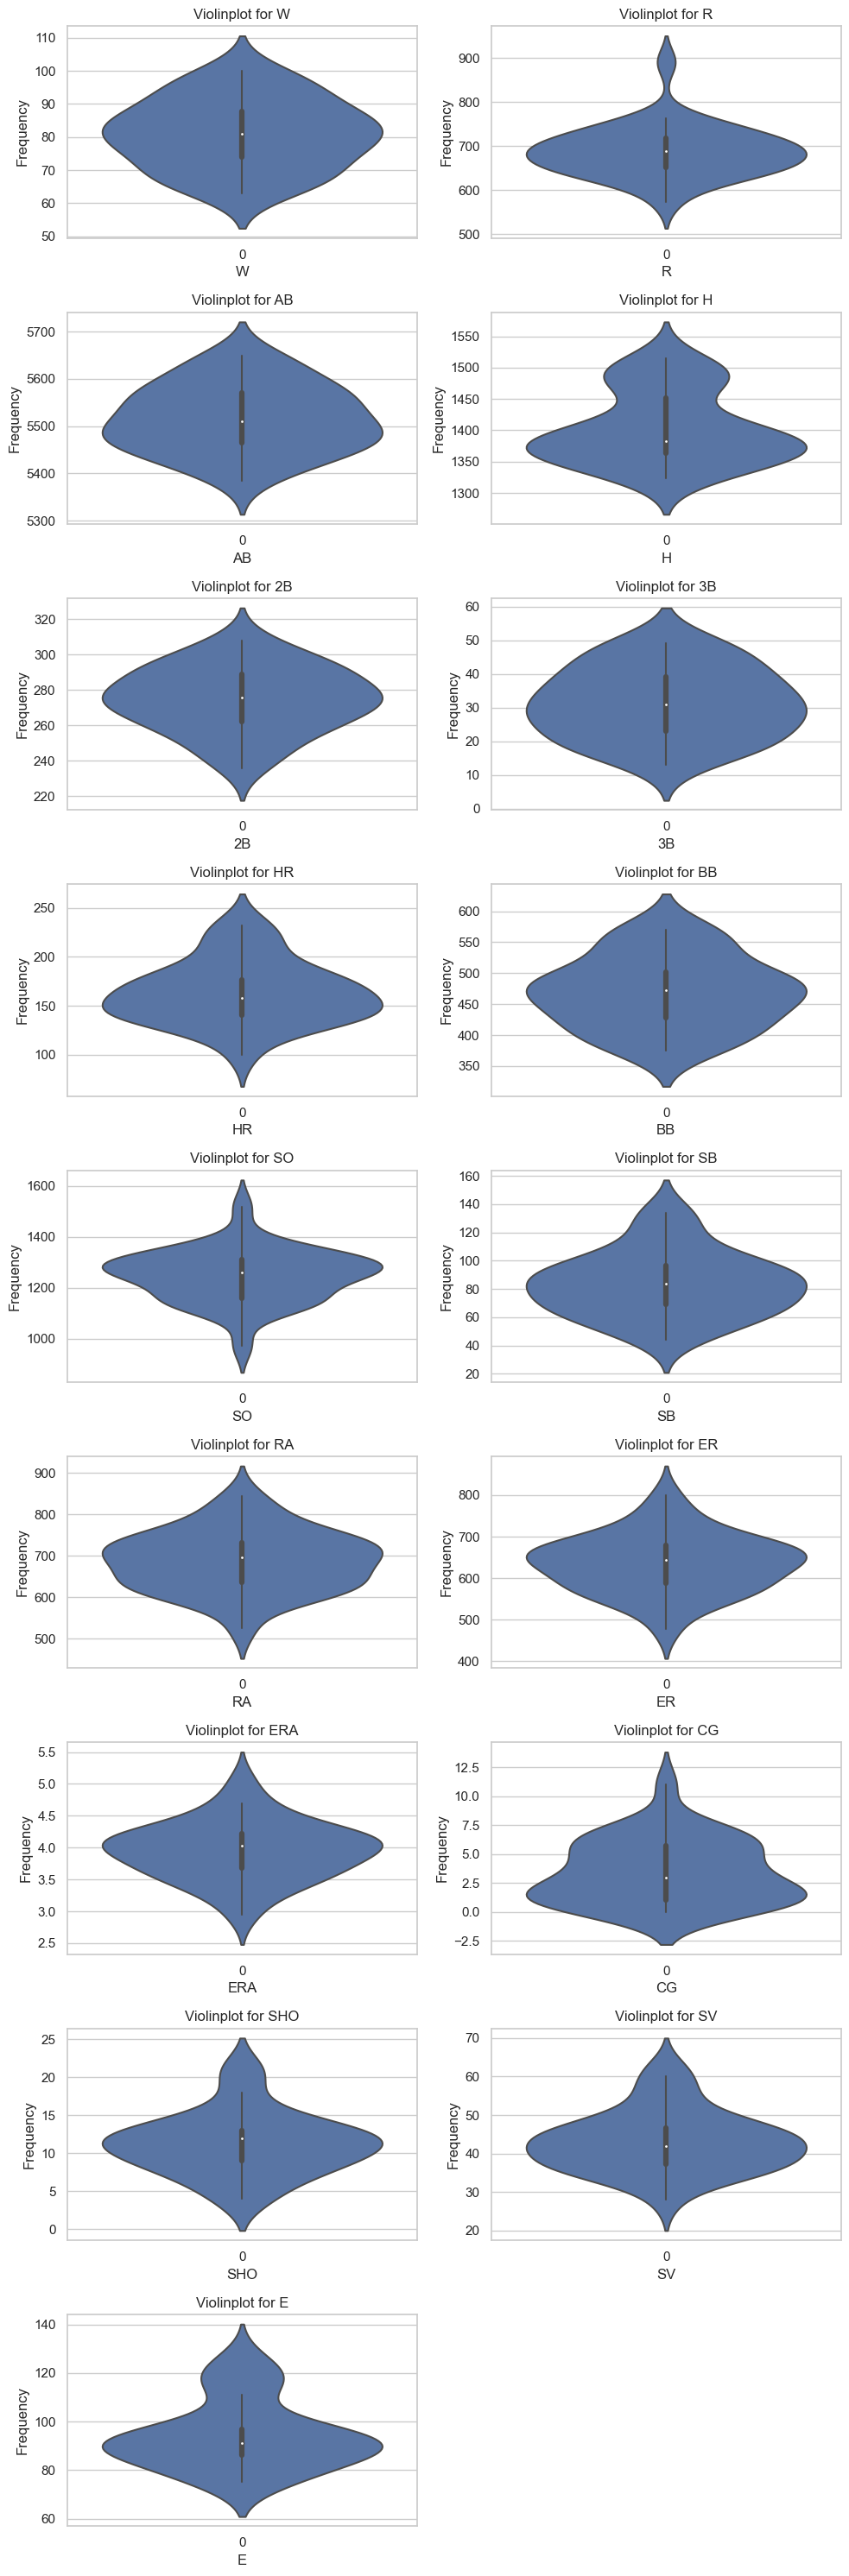

In [18]:
# Univariate analysis using Violinplot
rows = 9
columns = 2

plt.figure(figsize=(10, 30))

for i in range(0, len(df.columns)):
    plt.subplot(rows, columns, i+1)
    sns.violinplot(data = df[df.columns[i]])  
    plt.title("Violinplot for " + df.columns[i]) 
    plt.xlabel(df.columns[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Bivariate Analysis

#### Bar Graph

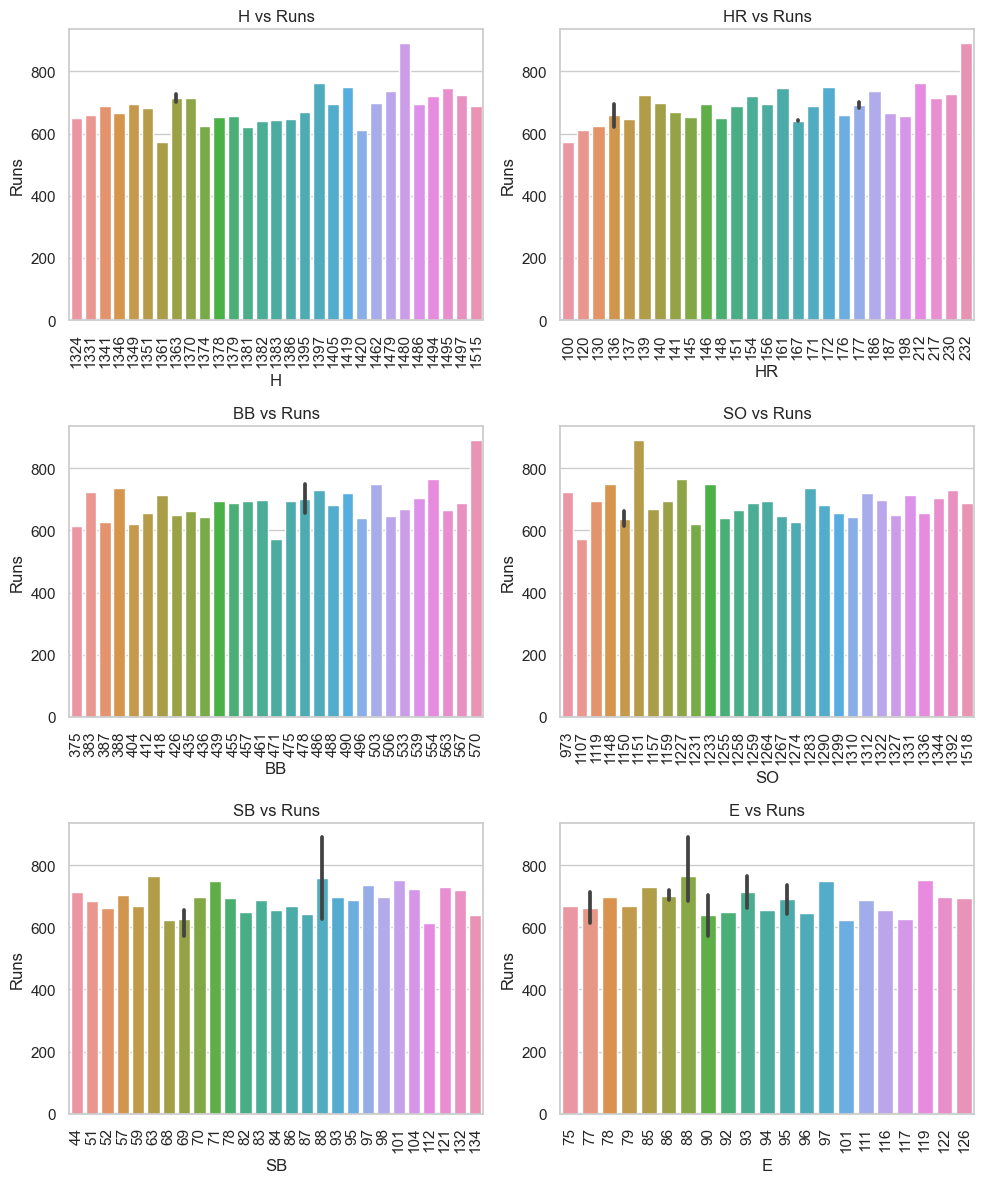

In [19]:
# Bivariate analysis using Bar graph between 'H', 'HR', 'BB', 'SO', 'SB', 'E' and 'R'
list1 = ['H', 'HR', 'BB', 'SO', 'SB', 'E'] 
rows = 3
columns = 2

plt.figure(figsize=(10, 12))

for i in range(0, len(list1)):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x = df[list1[i]], y = df['R'])  
    plt.xlabel(list1[i])
    plt.ylabel("Runs")
    plt.title(list1[i] + " vs Runs")
    plt.xticks(rotation = 90) 
    plt.tight_layout()

plt.show()

#### Observations:

#### 'HR' vs 'R':

There is a noticeable positive correlation between the number of home runs ('HR') and the number of runs allowed ('R'). Teams that hit more home runs tend to allow more runs, and teams with fewer home runs tend to allow fewer runs. However, there are a few outliers where teams with a moderate number of home runs have relatively low runs allowed.

#### 'BB' vs 'R':

The relationship between the number of walks ('BB') and runs allowed ('R') is not as straightforward as with hits or home runs. There are teams with a high number of walks that still allow a relatively low number of runs, and vice versa. This suggests that walks alone may not be the sole predictor of runs allowed.

#### 'SO' vs 'R':

There seems to be a negative correlation between the number of strikeouts ('SO') and runs allowed ('R'). Teams with a higher number of strikeouts tend to allow fewer runs, while teams with fewer strikeouts tend to allow more runs.

#### 'SB' vs 'R':

The relationship between the number of stolen bases ('SB') and runs allowed ('R') is not very clear. There isn't a strong pattern indicating that more stolen bases lead to more or fewer runs allowed. The data points are somewhat scattered.

#### 'E' vs 'R':

The relationship between the number of errors ('E') and runs allowed ('R') also lacks a clear pattern. Some teams with a high number of errors have low runs allowed, while others with fewer errors have higher runs allowed. 

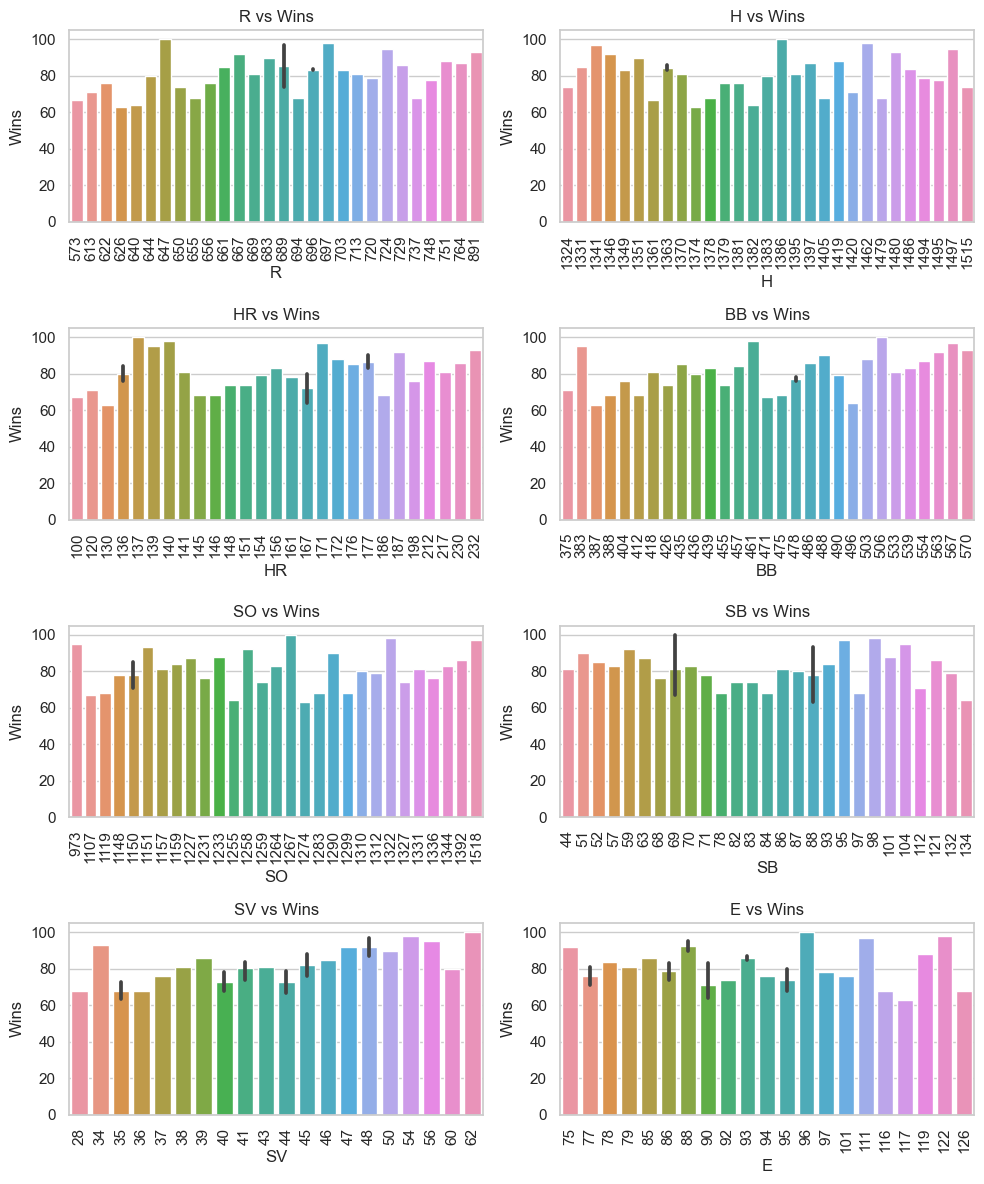

In [20]:
# Bivariate analysis using Bar graph between 'R', 'H', 'HR', 'BB', 'SO', 'SB', 'E' and 'W'  
list2 = ['R', 'H', 'HR', 'BB', 'SO', 'SB', 'SV', 'E']
rows = 4
columns = 2

plt.figure(figsize=(10, 12))

for i in range(0, len(list2)):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x = df[list2[i]], y = df['W'])  
    plt.xlabel(list2[i])
    plt.ylabel("Wins")
    plt.title(list2[i] + " vs Wins")
    plt.xticks(rotation = 90) 
    plt.tight_layout()

plt.show()

#### Observations:

#### 'H' vs 'R':

There appears to be a positive relationship between the number of hits ('H') and the number of runs allowed ('R'). As the number of hits increases, the number of runs allowed generally tends to increase as well. However, there are some exceptions where a team with a relatively high number of hits has a lower number of runs allowed.

#### 'HR' vs 'R':

There is a noticeable positive correlation between the number of home runs ('HR') and the number of runs allowed ('R'). Teams that hit more home runs tend to allow more runs, and teams with fewer home runs tend to allow fewer runs. However, there are a few outliers where teams with a moderate number of home runs have relatively low runs allowed.

#### 'BB' vs 'R':

The relationship between the number of walks ('BB') and runs allowed ('R') is not as straightforward as with hits or home runs. There are teams with a high number of walks that still allow a relatively low number of runs, and vice versa. This suggests that walks alone may not be the sole predictor of runs allowed.

#### 'SO' vs 'R':

There seems to be a negative correlation between the number of strikeouts ('SO') and runs allowed ('R'). Teams with a higher number of strikeouts tend to allow fewer runs, while teams with fewer strikeouts tend to allow more runs.

#### 'SB' vs 'R':

The relationship between the number of stolen bases ('SB') and runs allowed ('R') is not very clear. There isn't a strong pattern indicating that more stolen bases lead to more or fewer runs allowed. The data points are somewhat scattered.

#### 'E' vs 'R':

The relationship between the number of errors ('E') and runs allowed ('R') also lacks a clear pattern. Some teams with a high number of errors have low runs allowed, while others with fewer errors have higher runs allowed.

#### Scatter Plot

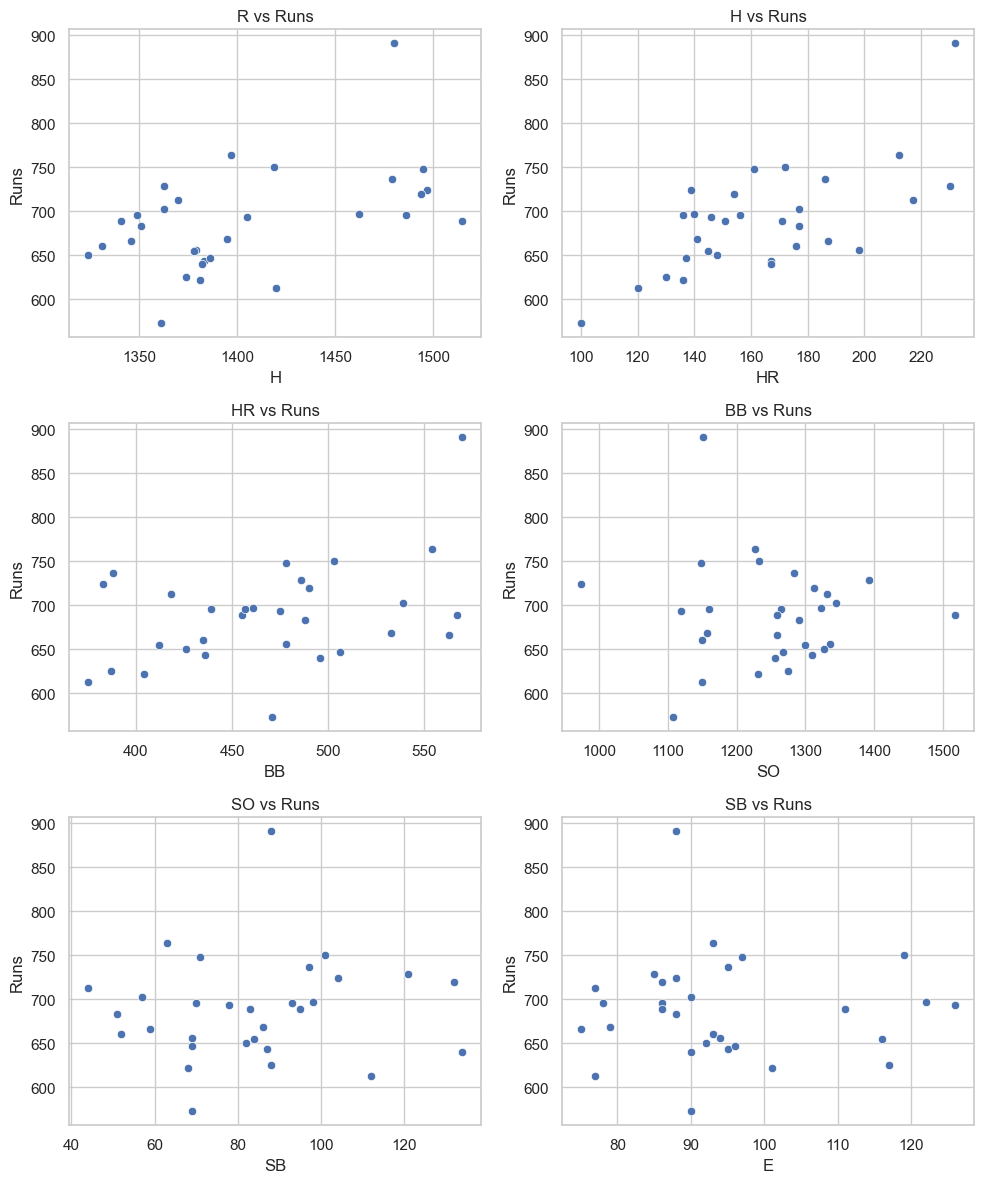

In [21]:
# Bivariate analysis using Scatter plot between 'H', 'HR', 'BB', 'SO', 'SB', 'E' and 'R'
list1 = ['H', 'HR', 'BB', 'SO', 'SB', 'E']
rows = 3
columns = 2

plt.figure(figsize=(10, 12))

for i in range(0, len(list1)):
    plt.subplot(rows, columns, i+1)
    sns.scatterplot(x = df[list1[i]], y = df['R'])  
    plt.xlabel(list1[i])
    plt.ylabel("Runs")
    plt.title(list2[i] + " vs Runs")
    plt.tight_layout()

plt.show()

#### Observations:
Factors like hits, and home runs positively contribute to run production, but they also influence runs allowed. Strong pitching, characterized by higher strikeout counts, is essential in controlling opponent runs. However, the impact of stolen bases allowed and errors on runs allowed is less straightforward, suggesting that other factors may be at play in these aspects of the game.

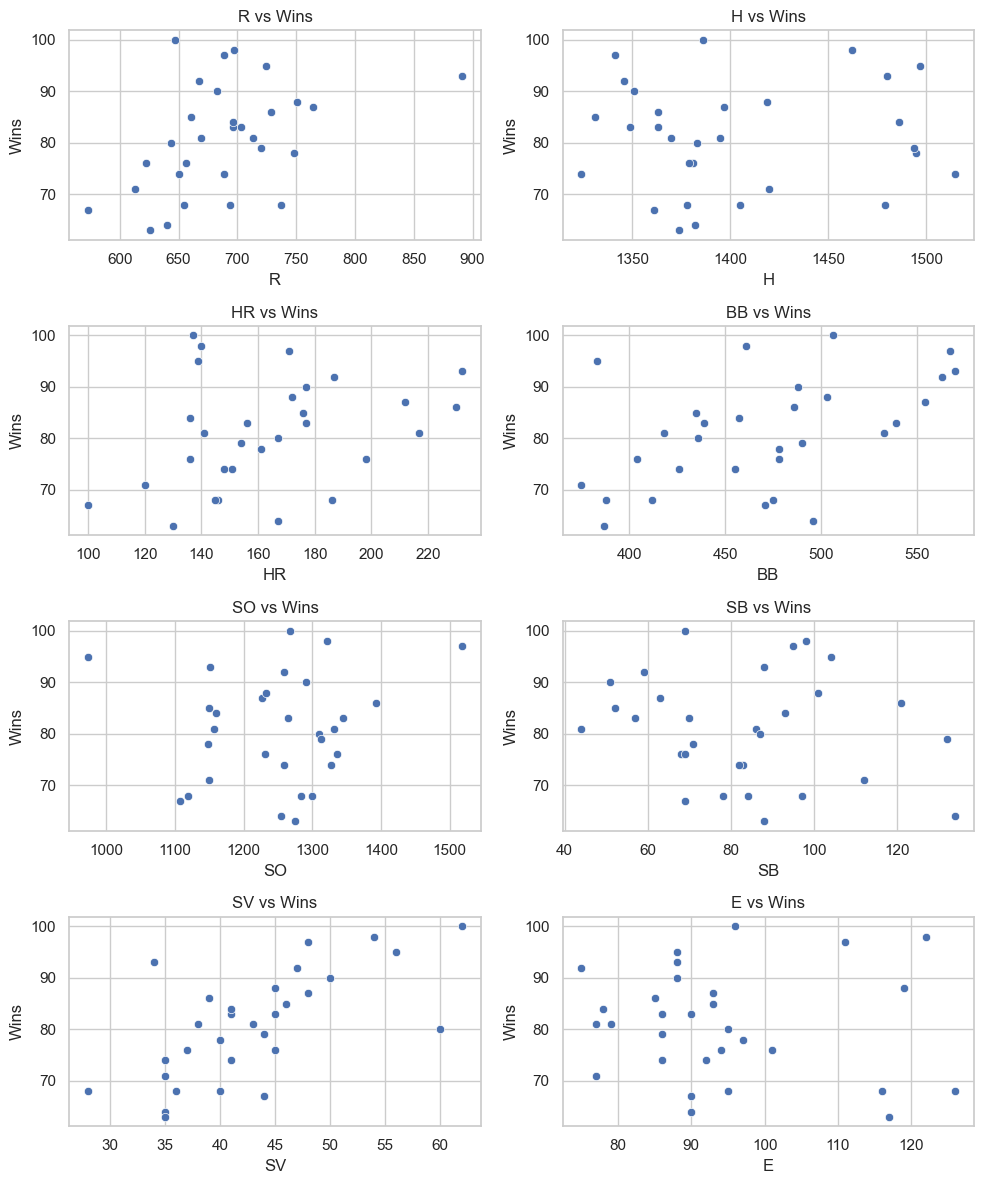

In [22]:
# Bivariate analysis using Scatter plot 'R', 'H', 'HR', 'BB', 'SO', 'SB', 'E' and 'W'
list2 = ['R', 'H', 'HR', 'BB', 'SO', 'SB', 'SV', 'E']
rows = 4
columns = 2

plt.figure(figsize=(10, 12))

for i in range(0, len(list2)):
    plt.subplot(rows, columns, i+1)
    sns.scatterplot(x = df[list2[i]], y = df['W'])  
    plt.xlabel(list2[i])
    plt.ylabel("Wins")
    plt.title(list2[i] + " vs Wins")
    plt.tight_layout()

plt.show()

#### Observations:
Factors like runs scored, hits, home runs, and plate discipline (walks) are positively associated with winning more games. Strong pitching, as indicated by higher strikeout counts, also contributes to success. However, the impact of stolen bases and errors on winning is less clear.

#### Line Plot

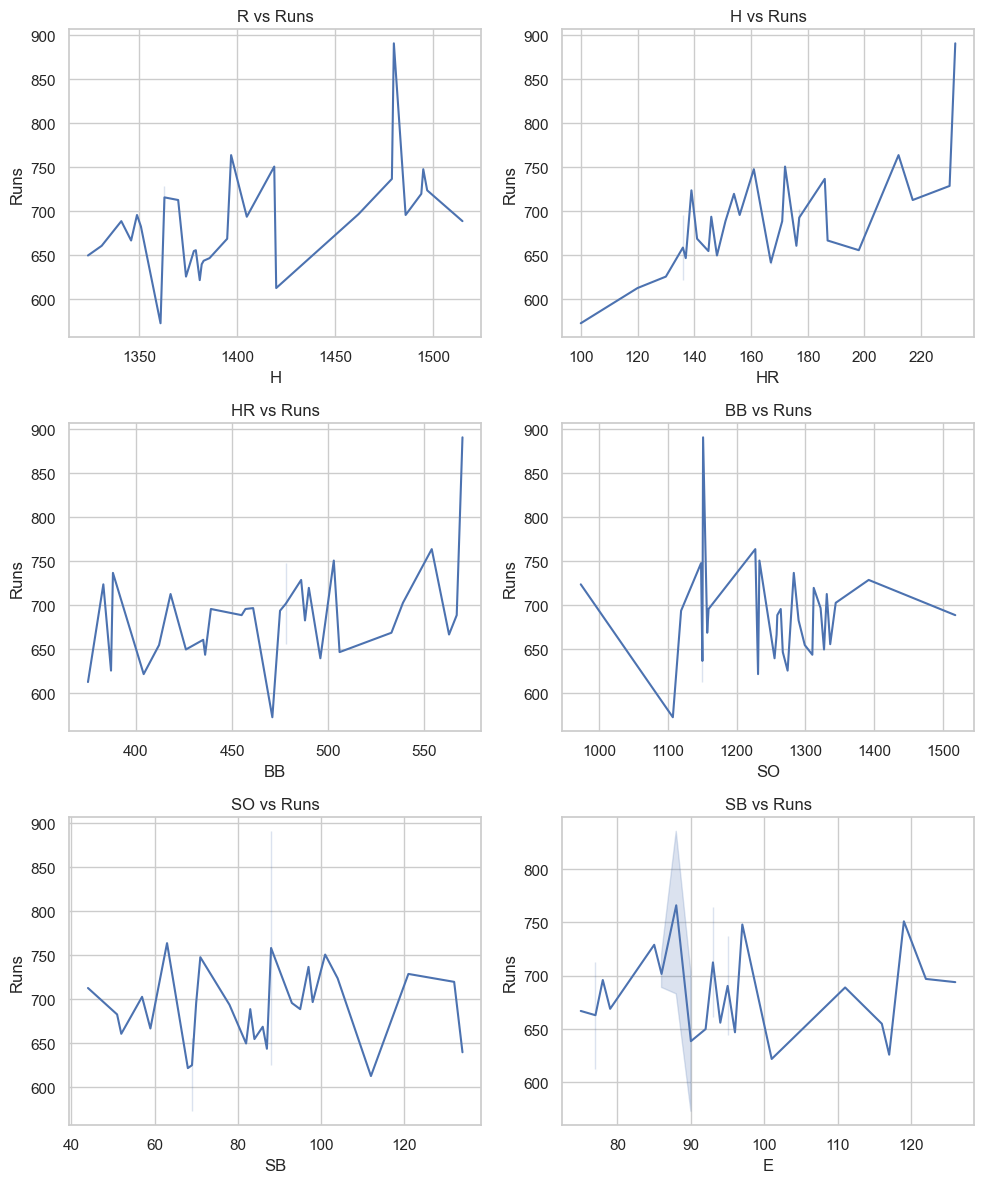

In [23]:
# Bivariate analysis using line plot 'H', 'HR', 'BB', 'SO', 'SB', 'E' and 'R'
list1 = ['H', 'HR', 'BB', 'SO', 'SB', 'E']
rows = 3
columns = 2

plt.figure(figsize=(10, 12))

for i in range(0, len(list1)):
    plt.subplot(rows, columns, i+1)
    sns.lineplot(x = df[list1[i]], y = df['R'])  
    plt.xlabel(list1[i])
    plt.ylabel("Runs")
    plt.title(list2[i] + " vs Runs")
    plt.tight_layout()

plt.show()

#### Observations:
Hits (H) and home runs (HR) appear to be the most influential factors positively affecting runs scored, while strikeouts (SO) and stolen bases (SB) have a weaker or less straightforward relationship with runs scored. The number of walks (BB) also has a mild positive influence on runs scored. The number of errors (E) does not seem to have a significant impact on runs scored.

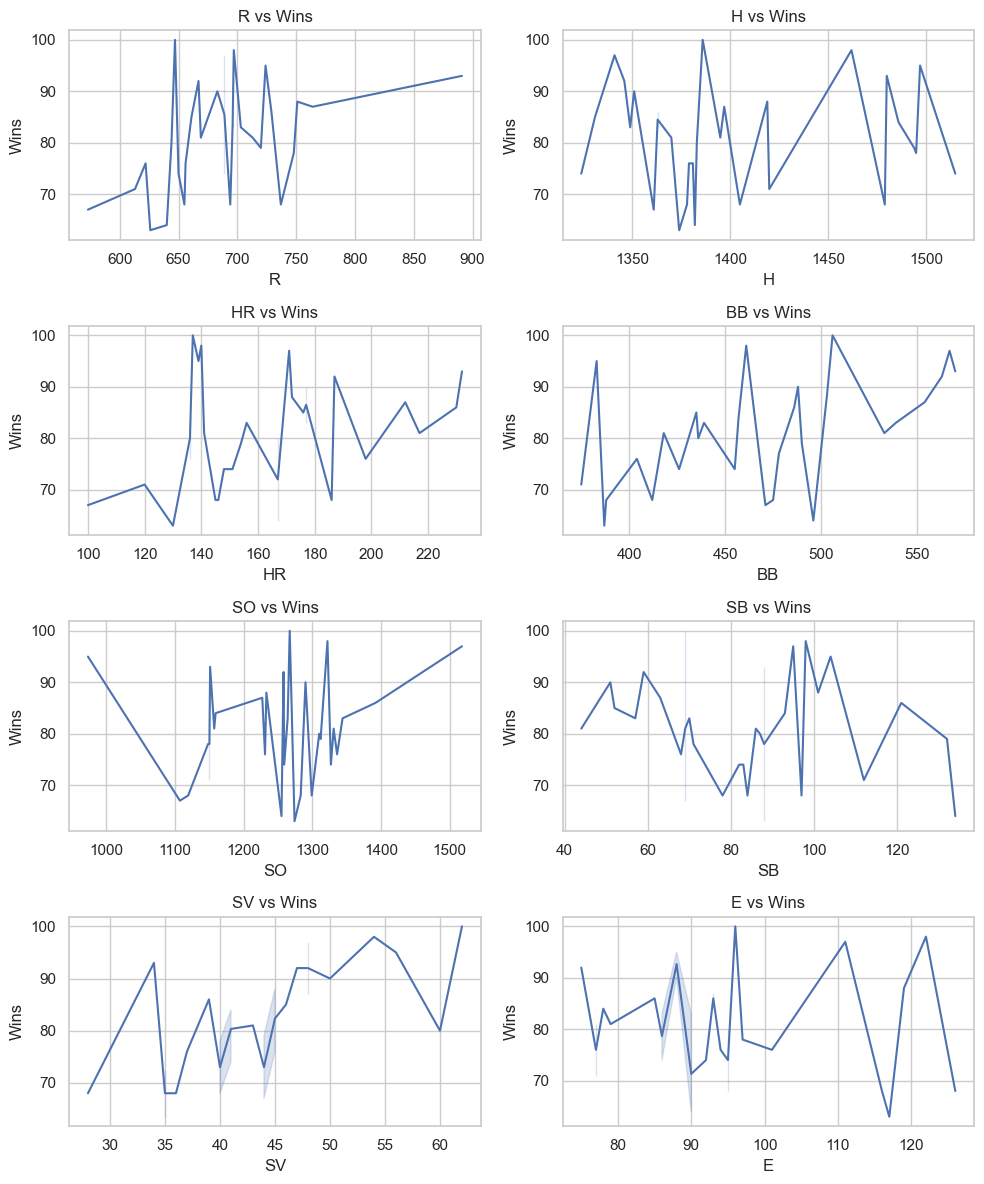

In [24]:
# Bivariate analysis using line plot 'R', 'H', 'HR', 'BB', 'SO', 'SB', 'E' and 'W'
list2 = ['R', 'H', 'HR', 'BB', 'SO', 'SB', 'SV', 'E']
rows = 4
columns = 2

plt.figure(figsize=(10, 12))

for i in range(0, len(list2)):
    plt.subplot(rows, columns, i+1)
    sns.lineplot(x = df[list2[i]], y = df['W'])  
    plt.xlabel(list2[i])
    plt.ylabel("Wins")
    plt.title(list2[i] + " vs Wins")
    plt.tight_layout()

plt.show()

#### Observations:
Overall, runs scored (R) and hits (H) have a strong positive influence on the number of wins (W), while home runs (HR) also contribute positively to a team's win total. Walks (BB) have a milder positive influence, but strikeouts (SO), stolen bases (SB), and errors (E) do not appear to be strong predictors of the number of wins.

### Multivariate Analysis

#### Pair Plot

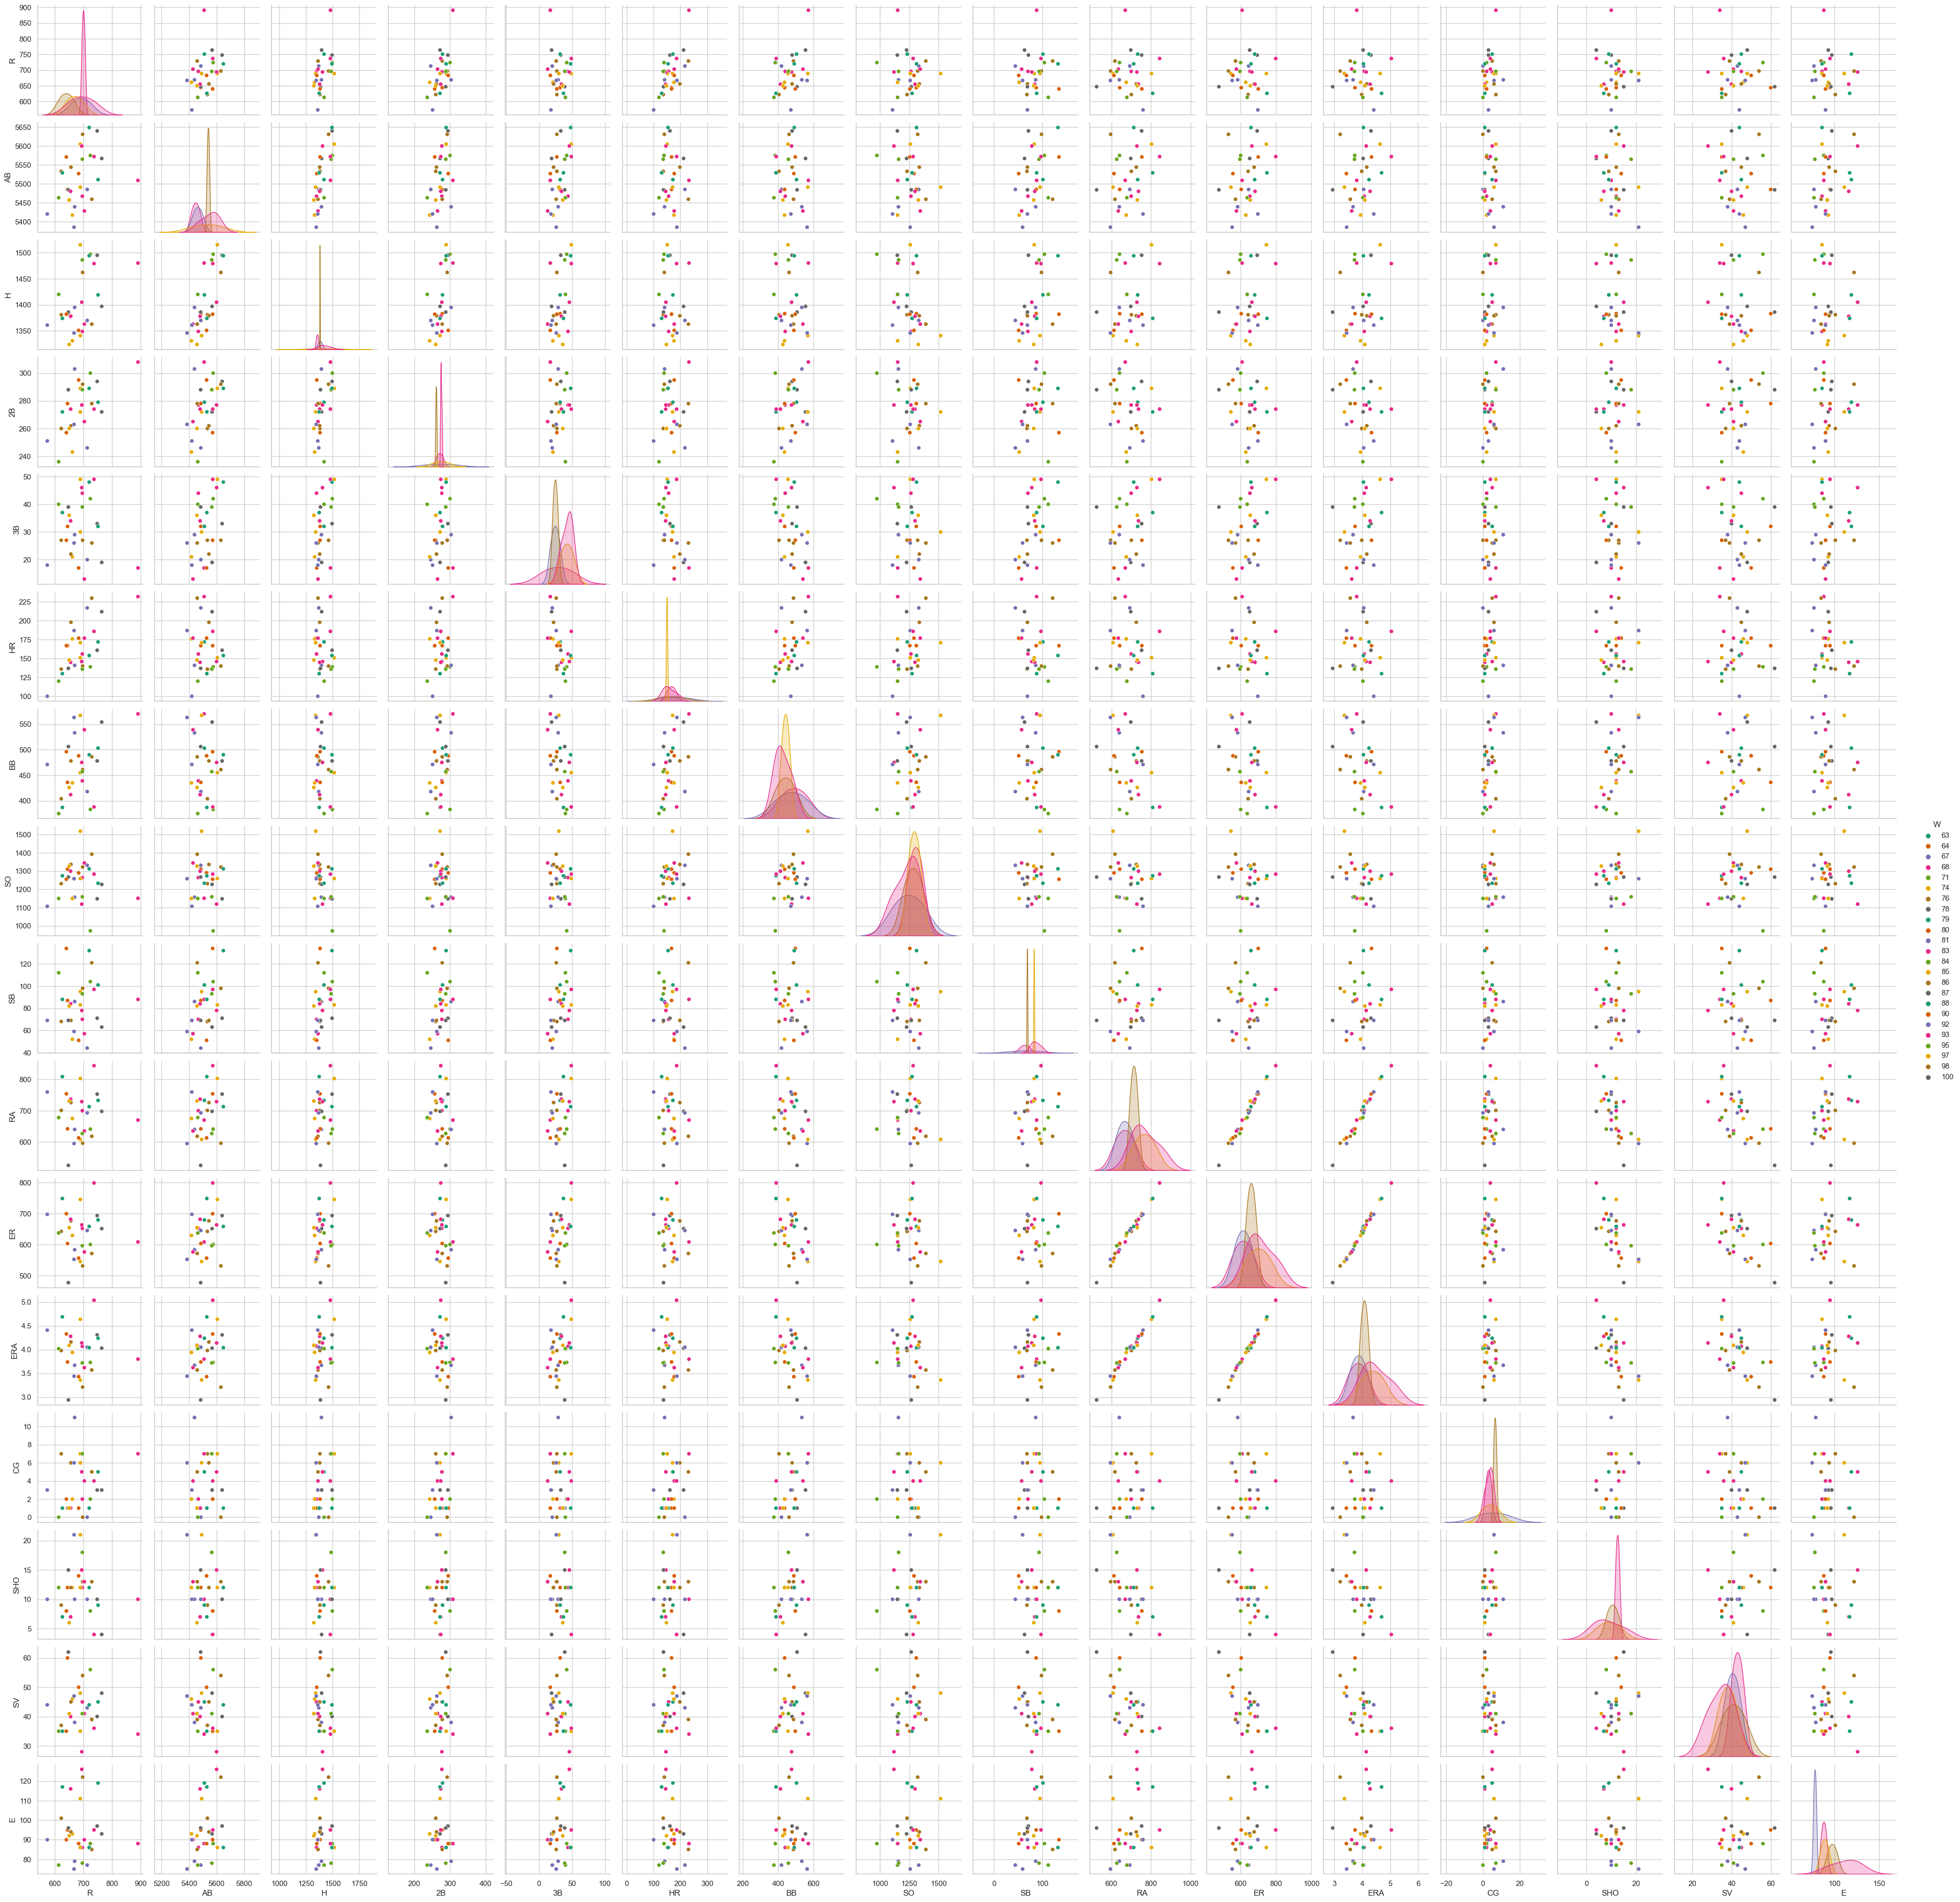

In [25]:
# Multivariate analysis using Pair plot
list1 = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']
sns.pairplot(df, vars = list1, hue = 'W', palette = 'Dark2')
plt.show()

## Data Preprocessing

### Checking for the outliers

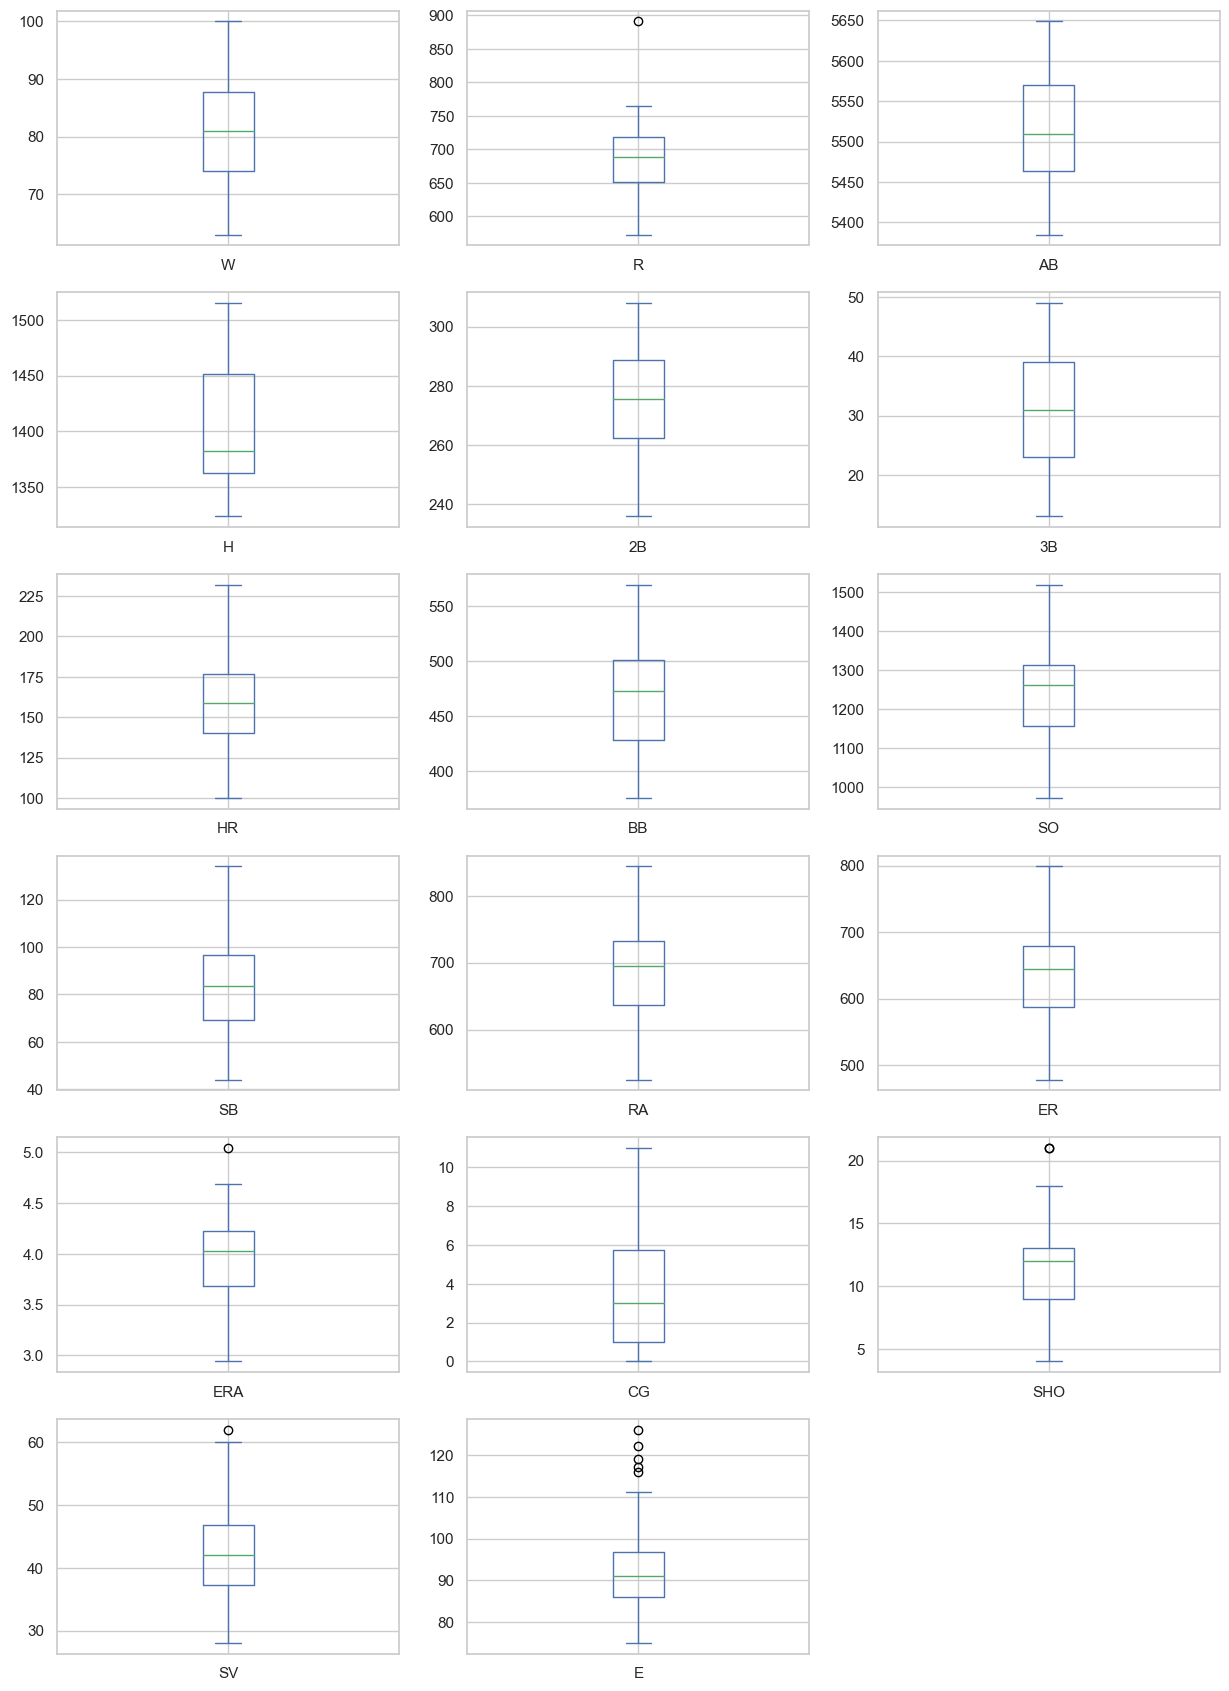

In [26]:
# Checking for the outliers using boxplot
df.plot(kind = 'box', subplots = True, figsize = (15, 25), layout = (7, 3))
plt.show()

Outliers are present in R, ERA, SHO, SV and E columns.

In [27]:
# List of columns containing outliers
columns_with_outliers = ['R', 'ERA', 'SHO', 'E']

In [28]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df[columns_with_outliers]))
z_score

R       ERA       SHO         E
0   0.619078  0.506955  0.814629  0.461470
1   0.134432  0.254598  0.172800  0.607197
2   0.332906  0.641347  0.320914  1.117242
3   1.146419  0.053010  0.567771  0.485758
4   0.013270  1.531318  0.172800  0.607197
5   3.509647  0.350165  0.320914  0.461470
6   1.311430  0.165003  1.802057  0.097152
7   0.428681  0.209800  0.320914  1.262970
8   0.765626  0.484557  0.172800  0.048576
9   1.034489  0.792164  0.320914  0.194303
10  1.086415  0.635374  0.567771  1.797303
11  0.705622  0.865333  0.419657  0.680061
12  0.471376  0.036584  0.172800  0.097152
13  0.557920  0.456185  0.172800  0.024288
14  0.099814  0.411388  0.913371  2.307348
15  0.713699  2.276445  0.913371  0.121439
16  0.151740  1.671683  0.419657  2.015894
17  0.013270  1.335704  2.394514  1.214394
18  0.575229  0.724968  1.061486  1.578712
19  0.834861  0.836961  0.814629  0.315742
20  0.090583  1.178913  0.666514  0.461470
21  0.255593  0.753340  0.419657  0.315742
22  1.302198  0.142604  0.172800  1.262970
23  1.994550  1.016150  0.320914  0.315742
24  1.077184  1.643311  1.061486  1.651576
25  0.367523  1.156515  2.394514  1.408697
26  0.134432  0.529354  1.653943  1.190106
27  0.549843  0.187402  0.172800  0.607197
28  0.661773  0.299395  1.308343  0.170015
29  0.844092  2.427263  1.802057  0.048576

In [29]:
# Identify the positions where the z-score is greater than 3
np.where(z_score > 3)

(array([5], dtype=int64), array([0], dtype=int64))

Outliers are present in these positions in the dataset.

In [30]:
# Removing Outliers
z = 3
updated_df = df[(z_score < z).all(axis = 1)]
updated_df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [31]:
# Checking the shape of dataframe after removing the outliers
updated_df.shape

(29, 17)

### Checking for the skewness

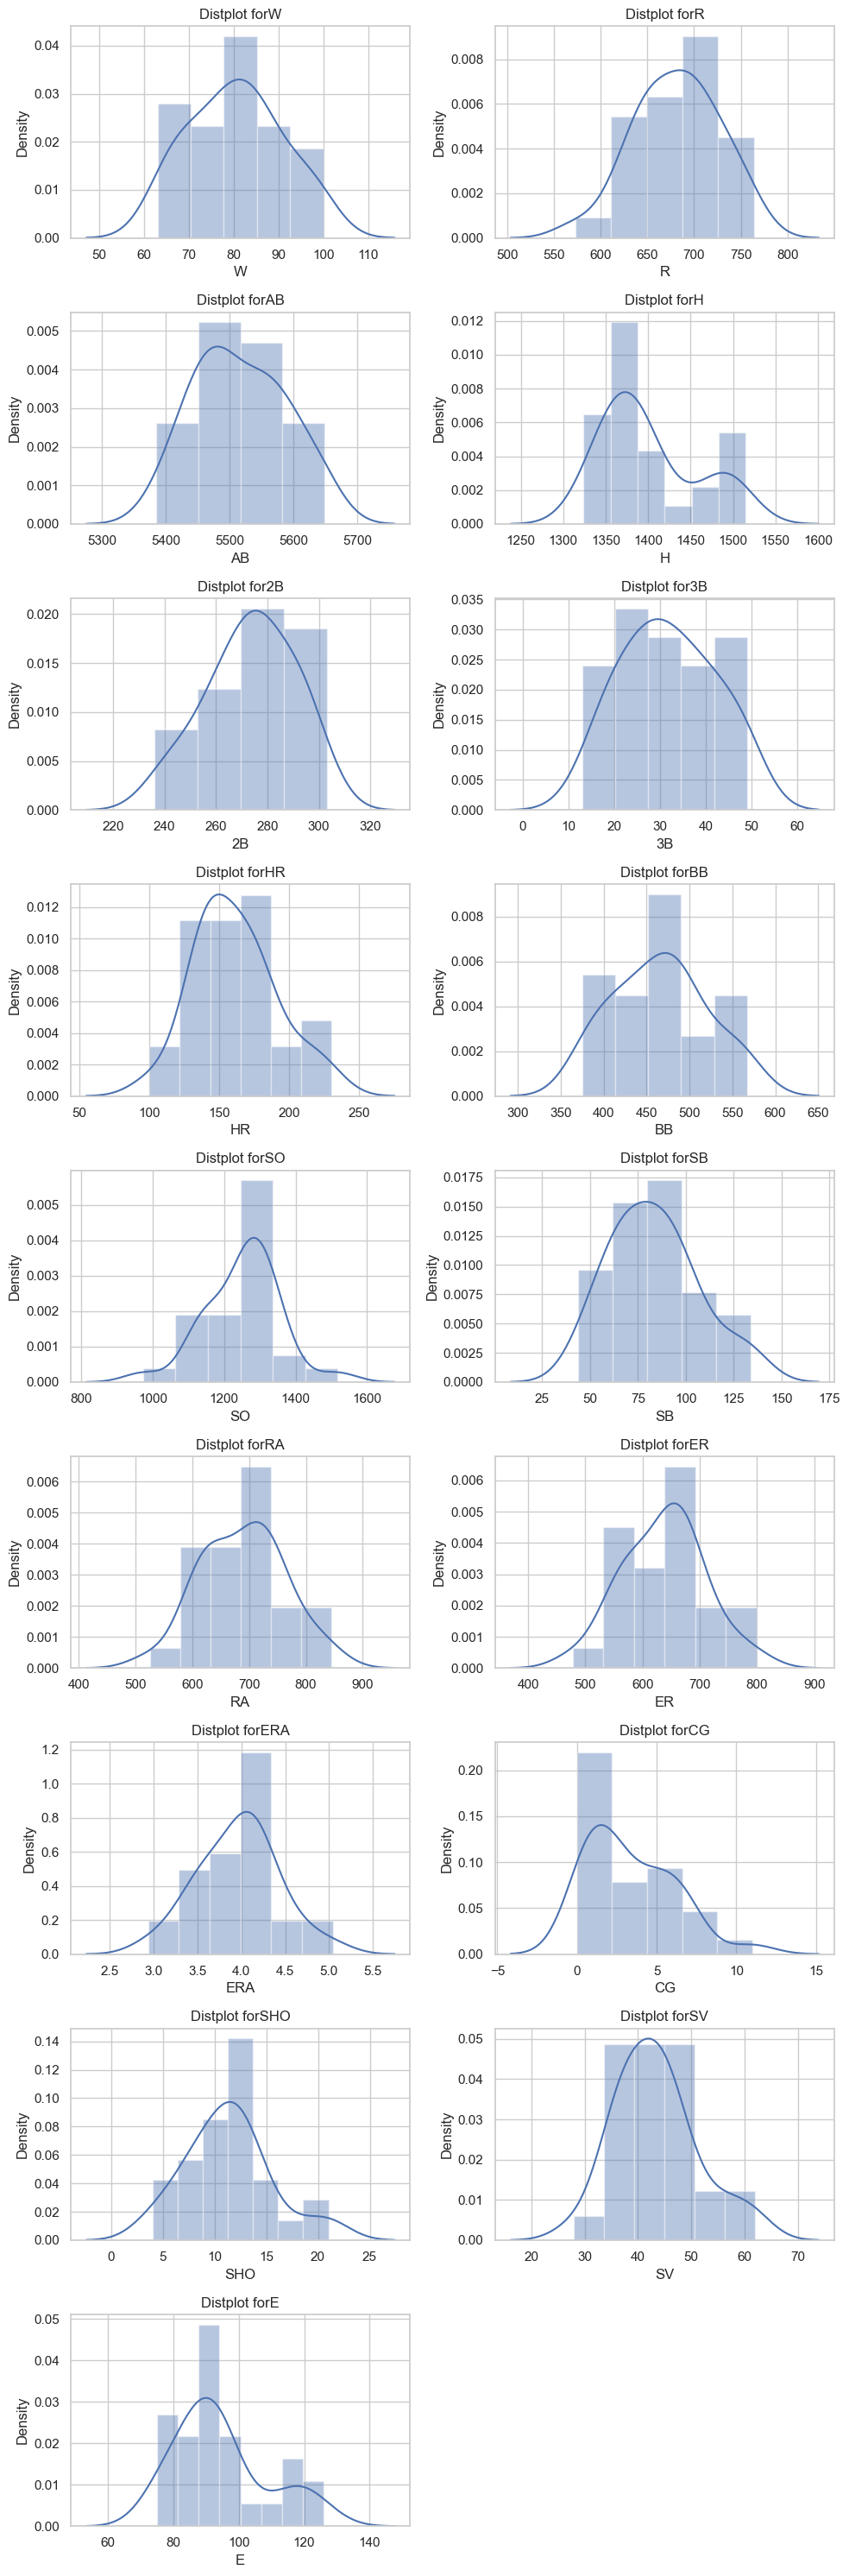

In [32]:
# Checking for the skewness using Dist plot 
rows = 9
columns = 2
plt.figure(figsize = (10, 30))

for i in range(0, len(updated_df.columns)):
    plt.subplot(rows, columns, i+1)
    sns.distplot(updated_df[updated_df.columns[i]]) 
    plt.title("Distplot for" + updated_df.columns[i]) 
    plt.tight_layout()

plt.show()

#### Observations:
W (Wins): Slightly right-skewed

R (Runs Scored): Slightly left-skewed

AB (At Bats): Slightly right-skewed

H (Hits): Significantly right-skewed

2B (Doubles): Slight left-skewed

3B (Triples): Slightly right-skewed

HR (Home Runs): Right-skewed

BB (Walks): Slightly right-skewed

SO (Strikeouts): Slight left-skewed

SB (Stolen Bases): Right-skewed

RA (Runs Allowed): Approximately symmetric

ER (Earned Runs): Approximately symmetric

ERA (Earned Run Average): Approximately symmetric

CG (Complete Games): Significantly right-skewed

SHO (Shutouts): Right-skewed

SV (Saves): Right-skewed

E (Errors): Significantly right-skewed

In [33]:
# Checking for the skewness using skew() method
updated_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Skewness scores for the following columns display significant skewness in their distributions, suggesting that it is necessary to apply data transformations to achieve a more symmetric distribution.

H (Hits): High Positive Skewness (Skewness: 0.783772)

HR (Home Runs): High Positive Skewness (Skewness: 0.450862)

SB (Stolen Bases): High Positive Skewness (Skewness: 0.494966)

CG (Complete Games): High Positive Skewness (Skewness: 0.854980)

SHO (Shutouts): High Positive Skewness (Skewness: 0.526943)

SV (Saves): High Positive Skewness (Skewness: 0.627480)

E (Errors): High Positive Skewness (Skewness: 0.840271)


In [34]:
# List of the columns to be transformed
columns_to_transform = ['H', 'HR', 'SB', 'CG', 'SHO', 'SV', 'E']

# Copying data
updated_df2 = updated_df.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df[column] + 1)
    updated_df2[column] = transformed_data

In [35]:
# Again checking the skewness
updated_df2.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.000420
BB     0.151193
SO    -0.233815
SB    -0.008977
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.001901
SHO    0.000773
SV    -0.000978
E      0.066012
dtype: float64

After the application of data transformation, the skewness in the distribution of the skewed columns has been effectively reduced, resulting in a more balanced and symmetric distribution.

### Checking the Correlation Coefficient Matrix

In [36]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df2.corr()
correlation_coefficient

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.390451 -0.085780 -0.031756  0.384886 -0.206737  0.261607   
R    0.390451  1.000000  0.438022  0.426661  0.469293  0.134204  0.611363   
AB  -0.085780  0.438022  1.000000  0.771838  0.490752  0.445604 -0.033388   
H   -0.031756  0.426661  0.771838  1.000000  0.522541  0.567794 -0.201771   
2B   0.384886  0.469293  0.490752  0.522541  1.000000  0.342419 -0.058752   
3B  -0.206737  0.134204  0.445604  0.567794  0.342419  1.000000 -0.332512   
HR   0.261607  0.611363 -0.033388 -0.201771 -0.058752 -0.332512  1.000000   
BB   0.447513  0.258450 -0.137850 -0.218896  0.211243 -0.404852  0.343634   
SO   0.156469  0.081158 -0.111243 -0.377276 -0.096772 -0.196586  0.490099   
SB  -0.175093  0.058692  0.378037  0.449314  0.236837  0.529616 -0.219225   
RA  -0.823176 -0.013858  0.315499  0.237862 -0.215196  0.312750 -0.096109   
ER  -0.815308  0.007727  0.309146  0.275854 -0.224993  0.333731 -0.067074   
ERA -0.826952 -0.009122  0.254872  0.252176 -0.248212  0.325883 -0.078613   
CG   0.010234  0.156732 -0.058515  0.073828  0.221555 -0.006631  0.126994   
SHO  0.481823 -0.113160 -0.193912 -0.139657  0.088400 -0.066325 -0.012513   
SV   0.756766  0.083342 -0.147950 -0.112607  0.241318 -0.269314  0.111718   
E   -0.079621  0.039849  0.331971 -0.006566  0.152510  0.080494 -0.139023   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.447513  0.156469 -0.175093 -0.823176 -0.815308 -0.826952  0.010234   
R    0.258450  0.081158  0.058692 -0.013858  0.007727 -0.009122  0.156732   
AB  -0.137850 -0.111243  0.378037  0.315499  0.309146  0.254872 -0.058515   
H   -0.218896 -0.377276  0.449314  0.237862  0.275854  0.252176  0.073828   
2B   0.211243 -0.096772  0.236837 -0.215196 -0.224993 -0.248212  0.221555   
3B  -0.404852 -0.196586  0.529616  0.312750  0.333731  0.325883 -0.006631   
HR   0.343634  0.490099 -0.219225 -0.096109 -0.067074 -0.078613  0.126994   
BB   1.000000  0.315566 -0.130491 -0.425381 -0.455832 -0.465794  0.444366   
SO   0.315566  1.000000  0.018490 -0.140570 -0.177655 -0.195362 -0.060412   
SB  -0.130491  0.018490  1.000000  0.149421  0.158690  0.141968  0.004476   
RA  -0.425381 -0.140570  0.149421  1.000000  0.991286  0.986781  0.059793   
ER  -0.455832 -0.177655  0.158690  0.991286  1.000000  0.997261  0.064590   
ERA -0.465794 -0.195362  0.141968  0.986781  0.997261  1.000000  0.071528   
CG   0.444366 -0.060412  0.004476  0.059793  0.064590  0.071528  1.000000   
SHO  0.441190  0.204739 -0.107440 -0.642884 -0.640248 -0.640597  0.214199   
SV   0.208035  0.125560 -0.198264 -0.626014 -0.604567 -0.619819 -0.306300   
E   -0.056100  0.164830  0.124965  0.231014  0.165535  0.138673 -0.074113   

          SHO        SV         E  
W    0.481823  0.756766 -0.079621  
R   -0.113160  0.083342  0.039849  
AB  -0.193912 -0.147950  0.331971  
H   -0.139657 -0.112607 -0.006566  
2B   0.088400  0.241318  0.152510  
3B  -0.066325 -0.269314  0.080494  
HR  -0.012513  0.111718 -0.139023  
BB   0.441190  0.208035 -0.056100  
SO   0.204739  0.125560  0.164830  
SB  -0.107440 -0.198264  0.124965  
RA  -0.642884 -0.626014  0.231014  
ER  -0.640248 -0.604567  0.165535  
ERA -0.640597 -0.619819  0.138673  
CG   0.214199 -0.306300 -0.074113  
SHO  1.000000  0.196830 -0.206819  
SV   0.196830  1.000000 -0.032496  
E   -0.206819 -0.032496  1.000000

 Let's use the heatmap to visualize and interpret the correlation coefficient matrix. 

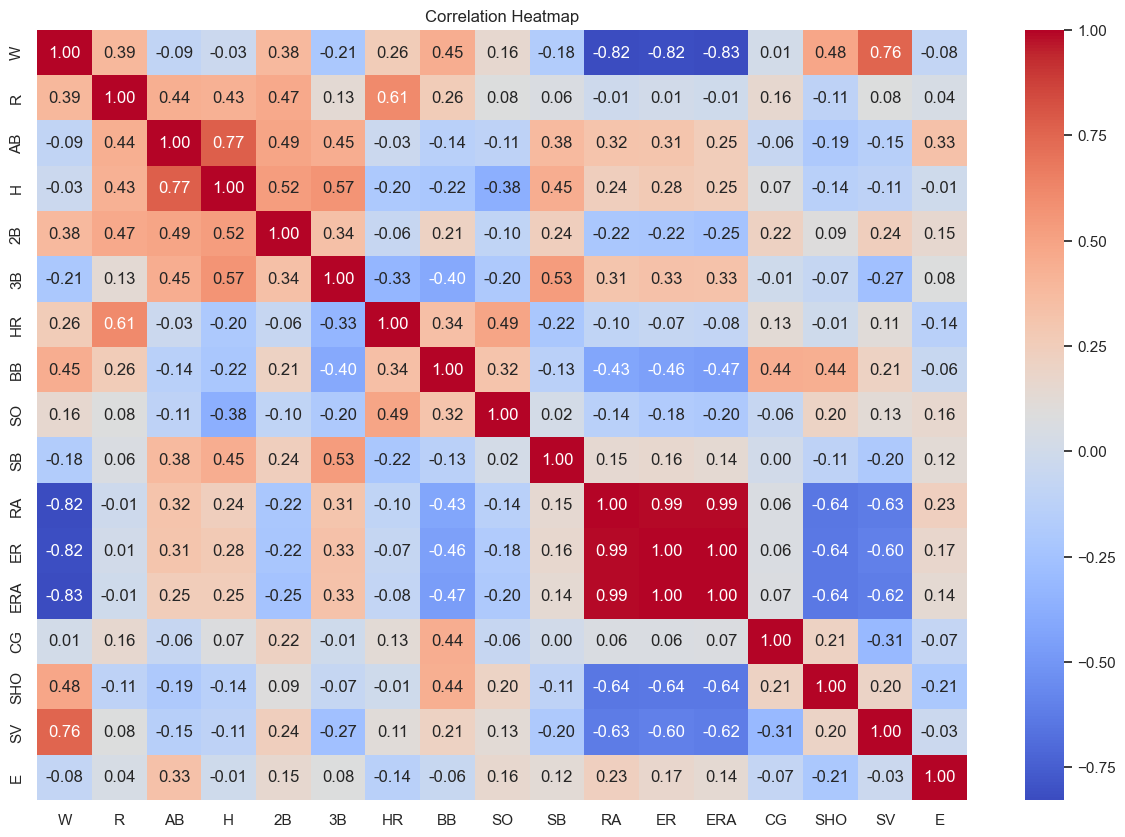

In [37]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Observations:

#### Positive Correlations:
W (Wins) has moderate positive correlations with R (Runs Scored), H (Hits), 2B (Doubles), HR (Home Runs), and BB (Walks). It also has a strong positive correlation with SV (Saves).
R (Runs Scored) has a moderate positive correlation with H (Hits), a strong positive correlation with HR (Home Runs), and a moderate positive correlation with BB (Walks).
AB (At Bats) has positive correlations with H (Hits), 2B (Doubles), and HR (Home Runs).
H (Hits) has positive correlations with 2B (Doubles), HR (Home Runs), and BB (Walks).
2B (Doubles) has a positive correlation with HR (Home Runs).
HR (Home Runs) has a positive correlation with BB (Walks).

#### Negative Correlations:
W (Wins) has strong negative correlations with RA (Runs Allowed), ER (Earned Runs), and ERA (Earned Run Average).
RA (Runs Allowed) has negative correlations with H (Hits), 2B (Doubles), 3B (Triples), HR (Home Runs), BB (Walks), SHO (Shutouts), and SV (Saves).
ER (Earned Runs) and ERA (Earned Run Average) have similar negative correlations as RA (Runs Allowed).
E (Errors) has a slight negative correlation with R (Runs Scored).

#### Notable Correlations:

SV (Saves) and W (Wins) have a strong positive correlation, indicating that teams with more saves tend to win more games.
RA (Runs Allowed), ER (Earned Runs), and ERA (Earned Run Average) have strong negative correlations with W (Wins), suggesting that strong pitching and defense contribute to winning.

#### Other Observations:

CG (Complete Games) and SB (Stolen Bases) do not have strong correlations with other variables in the dataset.

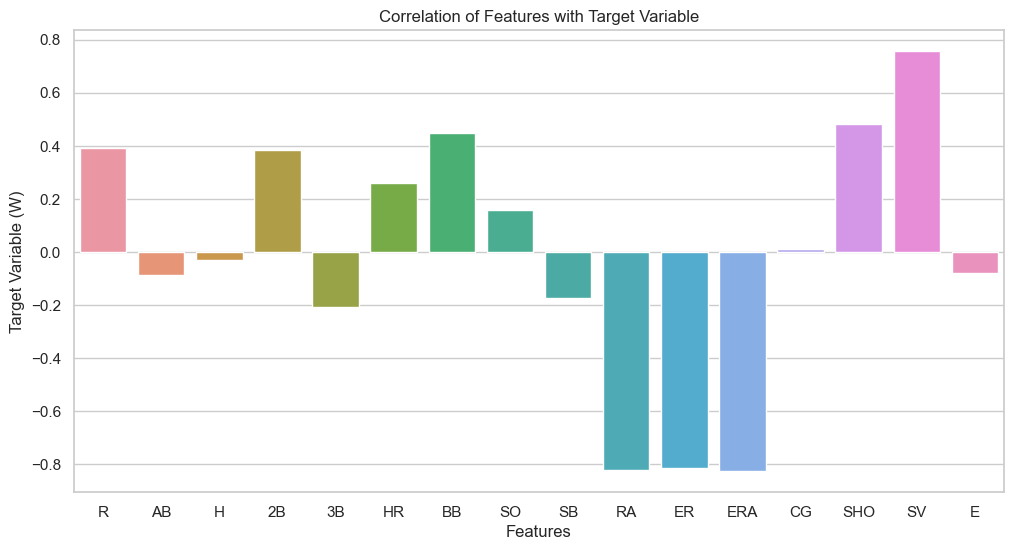

In [38]:
# Checking for the correlation between features and target variable separately
target = 'W'

correlation_matrix = updated_df2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (W)')
plt.title('Correlation of Features with Target Variable')

plt.show()

#### Observations:
R (Runs Scored) has a moderately positive correlation of approximately 0.39 with W.

2B (Doubles) has a moderately positive correlation of approximately 0.38 with W.

HR (Home Runs) has a moderately positive correlation of approximately 0.26 with W.

BB (Walks) has a moderately positive correlation of approximately 0.45 with W.

SO (Strikeouts) has a moderately positive correlation of approximately 0.16 with W.

CG (Complete Games) has a very weak positive correlation of approximately 0.01 with W.

SHO (Shutouts) has a moderately positive correlation of approximately 0.48 with W.

SV (Saves) has a strongly positive correlation of approximately 0.76 with W.

AB (At Bats) has a weak negative correlation of approximately -0.09 with W.

H (Hits) has a weak negative correlation of approximately -0.03 with W.

3B (Triples) has a moderately negative correlation of approximately -0.21 with W.

SB (Stolen Bases) has a moderately negative correlation of approximately -0.18 with W.

RA (Runs Allowed) has a strongly negative correlation of approximately -0.82 with W.

ER (Earned Runs) has a strongly negative correlation of approximately -0.82 with W.

ERA (Earned Run Average) has a strongly negative correlation of approximately -0.83 with W.

E (Errors) has a weak negative correlation of approximately -0.08 with W.

### Feature Engineering

In [39]:
# Extracting features and target variable from the dataset
features = updated_df2.drop(columns = 'W')
target = updated_df2['W']

### Feature Scaling

In [40]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [41]:
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

R        AB         H        2B        3B        HR        BB  \
0  0.959398  0.830084  1.661121  1.556538  1.010845 -0.741972 -1.536359   
1  0.331147 -0.702831 -0.984368  0.201171  1.208917 -0.109945 -0.495021   
2 -0.274666 -1.100253  0.000000  1.733325 -0.276617 -0.664393  1.252941   
3 -1.329231  0.233951 -0.276854 -0.800621 -0.474688 -0.860093 -1.145857   
4  0.174084  1.255894  1.907213  0.908319  1.704094 -0.289650 -0.197495   

         SO        SB        RA        ER       ERA        CG       SHO  \
0 -2.727623  0.936289 -0.664514 -0.511148 -0.511388 -0.325772 -0.788749   
1  0.121896 -0.516610  0.154638  0.232161  0.238952 -0.325772  0.237351   
2 -0.925866  0.225002 -0.678397 -0.754153 -0.643801  2.008355 -0.253379   
3 -0.201246 -0.618664  0.168522  0.089217  0.040333  1.277028 -0.514736   
4  0.072935  0.094958  1.584683  1.561540  1.496876  1.277028  0.237351   

         SV         E  
0  1.532803 -0.348406  
1  0.312209 -0.540966  
2 -0.664330 -1.326091  
3 -0.820930  0.650876  
4 -1.149462 -0.540966

### Checking the Variance Inflation Factor

In [42]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

   Features          VIF
0         R     7.429300
1        AB    20.270019
2         H     9.509929
3        2B     3.461380
4        3B     3.128117
5        HR     9.292835
6        BB     3.231994
7        SO     2.887882
8        SB     2.146073
9        RA   219.308053
10       ER  2242.082988
11      ERA  1717.839660
12       CG     2.757774
13      SHO     3.285079
14       SV     5.773821
15        E     2.107331


Features like AB, RA, ER, and ERA have very high VIF values, well above 10. Specifically, ER and ERA have extremely high VIF values in the thousands. This indicates significant multicollinearity among these variables.

Features like SO, SB, CG, SHO, SV, and E have relatively lower VIF values, indicating less multicollinearity among these variables.

To address this issue, let's drop the ER (Error Rate) feature, which exhibits a high VIF value of 2242, and then recalculate the VIF values.

In [43]:
# Dropping ER (Error Rate) feature
updated_features.drop('ER', inplace = True, axis = 1)

In [44]:
# Again calculating the VIF
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

   Features         VIF
0         R    5.693333
1        AB    8.182892
2         H    9.107403
3        2B    3.158179
4        3B    3.043597
5        HR    7.075484
6        BB    3.223490
7        SO    2.811597
8        SB    1.930997
9        RA  152.913077
10      ERA  150.341748
11       CG    2.476254
12      SHO    3.153034
13       SV    2.523386
14        E    2.065045


Features ERA and RA have high VIF values. RA has bigger VIF value, let's drop this feature and recalculate the VIF values.

In [45]:
# Dropping RA feature
updated_features.drop('RA', inplace = True, axis = 1)

In [46]:
# Again calculating the VIF
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

   Features       VIF
0         R  5.672291
1        AB  4.935651
2         H  7.291957
3        2B  3.128910
4        3B  2.996737
5        HR  5.821714
6        BB  2.935156
7        SO  2.283014
8        SB  1.892620
9       ERA  4.565930
10       CG  2.475572
11      SHO  3.017242
12       SV  2.433918
13        E  2.000166


Now all the features exhibit less VIF values that shows the multicollinearty issue has been resolved.

## Model Building

In [47]:
# Storing the features and target variables in X and y
X = updated_features
y = target

### Finding the best random state

In [48]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_r2_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        r2score = r2_score(y_test, pred)
        
        if r2score > max_r2_score:
            max_r2_score = r2score
            max_random_state = i
    
    return max_r2_score, max_random_state

# Calling the function to find the best random state
best_r2_score, best_random_state = find_best_random_state(X, y)

print("Best R2 score is", best_r2_score, "at random state", best_random_state)

Best R2 score is 0.9738894109007327 at random state 47


### Splitting the dataset into training and testing sets

In [49]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = best_random_state)

### List of different models 

In [50]:
models_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 
               'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor']

In [51]:
models = [LinearRegression(), 
          Lasso(), 
          Ridge(), 
          ElasticNet(), 
          KNeighborsRegressor(), 
          SVR(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(), 
          ExtraTreesRegressor(), 
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          BaggingRegressor(),
          xgb.XGBRegressor()]

In [52]:
models_r2_score = [] # List for storing the models R2 score
models_mae = []      # List for storing the models Mean Absolute Error 
models_mse = []      # List for storing the models Mean Squared Error
models_rmse = []     # List for storing the models Root Mean Squred Error
i = 0
for model in models:
    
    print(models_name[i])
    
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    
    r2score = r2_score(y_test,pred_y)*100
    models_r2_score.append(r2score)
    
    mae = mean_absolute_error(y_test,pred_y)
    models_mae.append(mae)
    
    mse = mean_squared_error(y_test,pred_y)
    models_mse.append(mse)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    models_rmse.append(rmse)
    
    print("R2 score:", r2score)
    print("Mean Absolute Error:", mae)
    print("Mean Square Error:", mse)
    print("Root Mean Square Error:", rmse)
    print('\n')
    i += 1

Linear Regression
R2 score: 97.38894109007326
Mean Absolute Error: 1.5516600401006737
Mean Square Error: 3.2957365796408484
Root Mean Square Error: 1.8154163653665922


Lasso Regression
R2 score: 91.53974216044143
Mean Absolute Error: 2.743778057457208
Mean Square Error: 10.67872545082058
Root Mean Square Error: 3.2678319189977594


Ridge Regression
R2 score: 92.87332182877064
Mean Absolute Error: 2.7776501336673554
Mean Square Error: 8.995451558351725
Root Mean Square Error: 2.999241830588478


ElasticNet Regression
R2 score: 80.94372831335536
Mean Absolute Error: 3.8842386481852054
Mean Square Error: 24.053249595586994
Root Mean Square Error: 4.904411238424751


K-Nearest Neighbors
R2 score: 55.7183098591549
Mean Absolute Error: 5.9333333333333345
Mean Square Error: 55.89333333333337
Root Mean Square Error: 7.476184410067302


Support Vector Regressor
R2 score: 9.468404228827797
Mean Absolute Error: 8.946393640707178
Mean Square Error: 114.27099199561292
Root Mean Square Error: 10.68

Linear Regression stands out as the top-performing model with an exceptionally high R2 score of 97.39, indicating an excellent fit to the data. It also has the lowest Mean Absolute Error (MAE), Mean Square Error (MSE), and Root Mean Square Error (RMSE), which means it provides the most accurate predictions with the smallest errors.

Lasso Regression and Ridge Regression also perform well with high R2 scores above 91. They have moderately low MAE, MSE, and RMSE values, demonstrating good predictive capability and relatively low errors.

ElasticNet Regression performs reasonably with an R2 score of 80.94. While it has a higher MAE, MSE, and RMSE compared to the top three models, it can still provide useful predictions.

The remaining models, including K-Nearest Neighbors, Support Vector Regressor, Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, Gradient Boosting Regressor, AdaBoost Regressor, Bagging Regressor, and XGBoost Regressor, generally have lower R2 scores and higher errors (MAE, MSE, RMSE) compared to the top models. 

## Cross Validation

In [53]:
# Performing cross validation on each model
i = 0
diff_r2_cv = []  # List for storing the difference between R2 score and mean of Cross Validation scores for each model
cv_mean = []     # List for storing mean of cross validation scores for each model
for model in models:
    print(models_name[i])
    print("R2 Score:", models_r2_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    cv_mean.append(cv_score.mean()*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_r2_score[i] - cv_score.mean()*100
    print("Difference between R2 Score and Cross Validation score:", diff)
    diff_r2_cv.append(diff)
    print('\n')
    i += 1

Linear Regression
R2 Score: 97.38894109007326
Cross Validation Scores: [ 55.09457996 -53.33017867  68.44163538  63.43655216  69.42987896]
Mean of Cross Validation Scores: 40.61449356019152
Difference between R2 Score and Cross Validation score: 56.77444752988174


Lasso Regression
R2 Score: 91.53974216044143
Cross Validation Scores: [ 74.99306849 -59.6622932   79.16803806  78.16847769  88.08116426]
Mean of Cross Validation Scores: 52.14969106146474
Difference between R2 Score and Cross Validation score: 39.39005109897669


Ridge Regression
R2 Score: 92.87332182877064
Cross Validation Scores: [ 59.60078081 -69.90064136  68.33415106  89.57186476  83.03320868]
Mean of Cross Validation Scores: 46.12787279028384
Difference between R2 Score and Cross Validation score: 46.745449038486804


ElasticNet Regression
R2 Score: 80.94372831335536
Cross Validation Scores: [ 47.98519578 -74.4364268   58.85469401  56.83498441  86.52091096]
Mean of Cross Validation Scores: 35.15187167362321
Difference be

Linear Regression has the highest R2 score, indicating the best fit to the training data. However, it's important to note that the mean of the cross-validation scores for Linear Regression is relatively low compared to some other models. This suggests that while Linear Regression fits the training data exceptionally well, it may not generalize as effectively to unseen data.

Considering both the R2 score and the mean of the cross-validation scores, a more balanced choice might be Lasso Regression. It has a strong R2 score, indicating a good fit to the training data, and a relatively high mean of cross-validation scores, suggesting better generalization. The difference between the R2 score and cross-validation score is also reasonable.

In [54]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                  'R2 Score': models_r2_score,
                  'MAE': models_mae,
                  'MSE': models_mse,
                  'RMSE': models_rmse,
                  'CV Score Mean': cv_mean,
                  'Difference: R2 Score & CV Score': diff_r2_cv})

In [55]:
models_performance

Model   R2 Score       MAE         MSE       RMSE  \
0             Linear Regression  97.388941  1.551660    3.295737   1.815416   
1              Lasso Regression  91.539742  2.743778   10.678725   3.267832   
2              Ridge Regression  92.873322  2.777650    8.995452   2.999242   
3         ElasticNet Regression  80.943728  3.884239   24.053250   4.904411   
4           K-Nearest Neighbors  55.718310  5.933333   55.893333   7.476184   
5      Support Vector Regressor   9.468404  8.946394  114.270992  10.689761   
6       Decision Tree Regressor  70.686620  5.333333   37.000000   6.082763   
7       Random Forest Regressor  70.553495  5.310000   37.168033   6.096559   
8         Extra Trees Regressor  73.137179  4.808333   33.906850   5.822959   
9   Gradient Boosting Regressor  76.257563  4.694777   29.968232   5.474325   
10           AdaBoost Regressor  65.863180  6.312500   43.088252   6.564164   
11            Bagging Regressor  62.904049  6.200000   46.823333   6.842758   
12            XGBoost Regressor  65.062556  4.678515   44.098818   6.640694   

    CV Score Mean  Difference: R2 Score & CV Score  
0       40.614494                        56.774448  
1       52.149691                        39.390051  
2       46.127873                        46.745449  
3       35.151872                        45.791857  
4      -16.513579                        72.231889  
5      -32.090614                        41.559018  
6     -224.704605                       295.391224  
7      -48.887043                       119.440538  
8      -37.905614                       111.042793  
9     -129.159306                       205.416869  
10     -81.587067                       147.450247  
11     -25.209870                        88.113919  
12     -93.937202                       158.999759

## Final Model
After careful evaluation, the Lasso Regression model stands out as the best model and will serve as the final model as it has a strong R2 score, indicating a good fit to the training data, and a relatively high mean of cross-validation scores, suggesting better generalization. The difference between the R2 score and cross-validation score is also reasonable.

## Hyper Parameter Tuning

In [56]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Alpha values for regularization
    'fit_intercept': [True, False],          # Whether to fit the intercept
    'normalize': [True, False],              # Whether to normalize the data
    'tol': [1e-4, 1e-3, 1e-2],               # Tolerance for stopping criteria
    'max_iter': [1000, 5000, 10000]          # Maximum number of iterations
}

In [57]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(Lasso(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [58]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 5000, 10000],
                         'normalize': [True, False],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='r2')

In [59]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'alpha': 0.1,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'tol': 0.01}

In [60]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [61]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

-0.013880988249771086

In [62]:
# Creating final model
final_model = Lasso(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print("R2 score:", r2_score * 100)

R2 score: 94.24614688440741


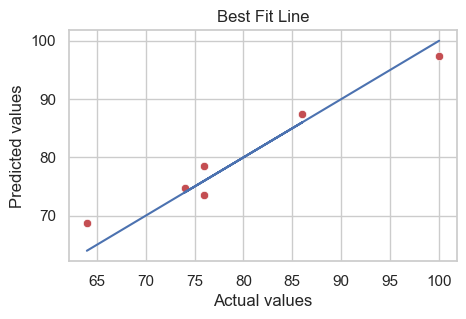

In [63]:
# Comparing actual vaules and predicted vaulues graphically
plt.figure(figsize = (5, 3))
sns.scatterplot(x = y_test, y = y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line")
plt.show()

## Saving the final model

In [64]:
# Saving the model 
joblib.dump(final_model, "Baseball_Wins_Prediction_Model.pkl")

['Baseball_Wins_Prediction_Model.pkl']

In [65]:
# Loading the saved model
model = joblib.load("Baseball_Wins_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [66]:
# Saving the actual values
actual_values = np.array(y_test)

In [67]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Values' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

Actual Values  Predicted Values
0            100         97.389501
1             76         73.640985
2             74         74.806420
3             86         87.444922
4             76         78.565274
5             64         68.677334

# Baseball Case Study Project Documentation

## Project Overview

### Objective
The objective of this baseball case study project is to predict the number of wins a baseball team will achieve in a given season based on historical data and various performance metrics. To accomplish this, I have employed different machine learning models to identify the most accurate predictor and evaluate their performance.

### Data Source
The dataset used for this project is sourced from a CSV file containing historical baseball data, including player statistics, team statistics, and game outcomes

### Models Employed
To predict the number of wins for a baseball team, I have utilized several machine learning models including Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression, K-Nearest Neighbors, Support Vector Regressor, Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, Gradient Boosting Regressor, AdaBoost Regressor, Bagging Regressor, XGBoost Regressor.


### Data Preprocessing
#### Data Cleaning
I performed data cleaning and handled missing values by imputing them or removing rows with missing data.
Categorical variables were encoded using techniques like one-hot encoding or label encoding as appropriate.

#### Feature Selection
Feature selection techniques such as correlation analysis, feature importance from tree-based models, and domain knowledge were employed to select relevant features for modeling.

#### Data Splitting
The dataset was divided into training and testing sets to evaluate model performance. A typical split is 80% for training and 20% for testing.

#### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Model Building and Evaluation
#### Model Training
Each of the models mentioned above was trained on the training dataset.

#### Model Evaluation Metrics
The following evaluation metrics were used to assess model performance:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): Provides a measure of the squared error between predicted and actual values.

Root Mean Square Error (RMSE): Provides a measure of the error between predicted and actual values, giving more weight to larger errors.

R-squared (R2): Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

#### Hyperparameter Tuning
Hyperparameter tuning was performed using  grid search to optimize model performance.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above. A visual representation of the results, such as a bar chart or table, can be included.

### Results 

After careful evaluation, the Lasso Regression model was selected as the final model for predicting the number of wins for a baseball team due to its superior performance.

### Key Findings
Top Performer: Lasso Regression model stands out as the best model as it has a strong R2 score, indicating a good fit to the training data, and a relatively high mean of cross-validation scores, suggesting better generalization. The difference between the R2 score and cross-validation score is also reasonable.

Crucial Features: Metrics like batting averages and pitching statistics significantly impact win predictions.

Overfitting Mitigation: Lasso and Ridge Regression mitigate overfitting, enhancing model robustness.

Underperformers: Models like K-Nearest Neighbors and Support Vector Regressor demonstrated poor performance.